#Import library and Data from google form

In [ ]:
#import library สำหรับการทำ visualization และการประมวลผลข้อมูล
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from os import path
from PIL import Image
import numpy as np
import wordcloud
from wordcloud import WordCloud, STOPWORDS

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
pip install pythainlp #install library pythianlp from Python Package Index

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.9/17.9 MB 24.4 MB/s eta 0:00:00


In [ ]:
#สำหรับ word cloud
from pythainlp.tokenize import word_tokenize #cut sentences into word
from pythainlp.corpus import thai_stopwords #cut down unneccessary word
from pythainlp.util import normalize #make into standard format
import pythainlp #set Thai language
from pythainlp.util import eng_to_thai #English to Thai
from pythainlp.util import collate #sorting data

In [ ]:
# import ผลลัพธ์ใน google form ในรูปแบบของ csv , อ่านผ่าน url ของ form
url_form = 'https://drive.google.com/file/d/1Y_1SX1wQhIho44CdMSu1GBoMLEjBjR7R/view?usp=sharing' #csv link
file_id_form = url_form.split('/')[-2]
dwn_url_form = 'https://drive.google.com/uc?id=' + file_id_form


In [ ]:
mpl.__version__ # ดู Matplotlib version

'3.7.1'

In [ ]:
#to use thai font
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
mpl.font_manager.fontManager.addfont("thsarabunnew-webfont.ttf")
mpl.rc('font',family="TH Sarabun New",size = '16')

In [ ]:
df = pd.read_csv(dwn_url_form) #read data from url
#df.info() #แสดงรายละเอียด data
#data = pd.DataFrame(df)
#print(df.columns) #แสดงชื่อคอลัมน์
#df

#Data cleaning

### ส่วนที่ 1 : ข้อมูลทั่วไป




ชั้นปี

In [ ]:
# ทำการแทนค่าในคอลัมน์ 'ชั้นปี' ที่มีค่า 'สูงกว่าชั้นปีที่ 6 (รหัส 60 เป็นต้นไป)'
# ด้วยค่า '>6 (รหัส 60 ขึ้นไป)'
df['ชั้นปี'] = df['ชั้นปี'].replace('สูงกว่าชั้นปีที่ 6 (รหัส 60 เป็นต้นไป)', '>6 (รหัส 60 ขึ้นไป')
df_year = df



### ส่วนที่ 2 : การใช้สวัสดิการและสิ่งอำนวยความสะดวก (ด้านสวัสดิการและสิ่งอำนวยความสะดวก)

ด้านการเดินทางและความปลอดภัย

1. คุณเดินทางด้วยวิธีใดบ่อยที่สุดในการใช้ชีวิตในมหาวิทยาลัยธรรมศาสตร์


In [ ]:
# ทำการเปลี่ยนชื่อของคอลัมน์เพื่อให้สั้นลงและสื่อสารความหมายเข้าใจมากขึ้น
df1 = df.rename(columns={'คุณเดินทางด้วยวิธีใดบ่อยที่สุดในการใช้ชีวิตในมหาวิทยาลัยธรรมศาสตร์\n(อธิบาย : วิธีที่ใช้เดินทางในวันที่ไปเรียนและในวันปกติ , หากใช้วิธีในการเดินทางนอกเหนือจากตัวเลือกที่มีโปรดระบุในอื่น ๆ)':'คุณเดินทางด้วยวิธีใดบ่อยที่สุดในการใช้ชีวิตในมหาวิทยาลัยธรรมศาสตร์'})

# เปลี่ยนค่าที่มีคำว่า "วิน" หรือ "มอเตอร์" เป็น "รถรับจ้าง"
# เปลี่ยนค่าที่เป็น "จักรยานยนต์ของเพื่อน" เป็น "รถส่วนตัว"
# เปลี่ยนค่าที่เป็น "แท็กซี่" เป็น "รถรับจ้าง"
df1 = df1.replace(to_replace=r'.*วิน.*', value='รถรับจ้าง', regex=True)
df1 = df1.replace(to_replace=r'.*มอเตอร์.*', value='รถรับจ้าง', regex=True)
df1 = df1.replace(to_replace=r'.*ส่วนตัว.*', value='รถส่วนตัว', regex=True)
df1 = df1.replace("จักรยานยนต์ของเพื่อน", "รถส่วนตัว")
df1 = df1.replace("แท็กซี่", "รถรับจ้าง")

# นับจำนวนของค่าที่แตกต่างกันในคอลัมน์ 'คุณเดินทางด้วยวิธีใดบ่อยที่สุดในการใช้ชีวิตในมหาวิทยาลัยธรรมศาสตร์'
df1_counts = df1['คุณเดินทางด้วยวิธีใดบ่อยที่สุดในการใช้ชีวิตในมหาวิทยาลัยธรรมศาสตร์'].value_counts()

# พิมพ์ผลลัพธ์การนับจำนวนของค่าที่แตกต่างกันในคอลัมน์
print(df1_counts)


คุณเดินทางด้วยวิธีใดบ่อยที่สุดในการใช้ชีวิตในมหาวิทยาลัยธรรมศาสตร์
เดินเท้า                              42
รถส่วนตัว                             21
รถโดยสารสาธารณะของมหาวิทยาลัย (EV)    21
รถรับจ้าง                             18
Name: count, dtype: int64


2. ปัญที่คุณมักจะพบเจอในการใช้รถโดยสารสาธารณะของมหาวิทยาลัย (EV)

In [ ]:
# ทำการเปลี่ยนชื่อของคอลัมน์เพื่อให้สั้นลงและสื่อสารความหมายเข้าใจมากขึ้น
df2 = df.rename(columns={'ปัญหาที่คุณมักจะพบเจอในการใช้รถโดยสารสาธารณะของมหาวิทยาลัย (EV)\n(อธิบาย : หากพบเจอปัญหานอกเหนือจากตัวเลือกโปรดระบุในอื่น ๆ)':'ปัญหาที่คุณมักจะพบเจอในการใช้รถโดยสารสาธารณะของมหาวิทยาลัย (EV)'})

# แยกข้อมูลในคอลัมน์ 'ปัญที่คุณมักจะพบเจอในการใช้รถโดยสารสาธารณะของมหาวิทยาลัย (EV)' เป็นรายการคำตอบแยกกัน
df_split = df2['ปัญหาที่คุณมักจะพบเจอในการใช้รถโดยสารสาธารณะของมหาวิทยาลัย (EV)'].str.split(',', expand=True).stack()

# ลบช่องว่างที่อยู่ด้านหน้าและด้านหลังของข้อความ
df_split = df_split.str.strip()

# เปลี่ยนค่าที่เป็น "มีบางเส้นทางที่รถ EV ผ่านน้อยมากๆ" เป็น "เส้นทางการเดินรถน้อย"
df_split = df_split.replace("มีบางเส้นทางที่รถ EV ผ่านน้อยมากๆ", "เส้นทางการเดินรถน้อย")

# นับจำนวนของแต่ละคำตอบ
df2_counts = df_split.value_counts()

# พิมพ์ผลลัพธ์การนับจำนวนของคำตอบที่แยกออกมา
print(df2_counts)


รถ EV มีรอบบริการน้อย           19
รถ EV มาไม่ตรงเวลา              17
พฤติกรรมการขับรถของคนขับ         7
จุดรอรถ EV มีน้อย                6
สภาพรถ EV มีความเก่าและชำรุด     2
เส้นทางการเดินรถน้อย             1
Name: count, dtype: int64


3. คุณต้องการให้ทางมหาวิทยาลัยปรับปรุงแก้ไขการใช้งานรถ EV อย่างไรมากที่สุด

In [ ]:
# ทำการเปลี่ยนชื่อของคอลัมน์เพื่อให้สั้นลงและสื่อสารความหมายเข้าใจมากขึ้น
df3 = df.rename(columns={'คุณต้องการให้ทางมหาวิทยาลัยปรับปรุงแก้ไขการใช้งานรถ EV อย่างไรมากที่สุด\n(อธิบาย : สิ่งที่ต้องการให้มหาวิทยาลัยแก้ไขมากที่สุดเป็นอันดับแรก ในเรื่องของการใช้รถ EV , หากต้องการให้มีการปรับปรุงแก้ไขนอกเหนือจากตัวเลือกโปรดระบุในอื่น ๆ)':'คุณต้องการให้ทางมหาวิทยาลัยปรับปรุงแก้ไขการใช้งานรถ EV อย่างไรมากที่สุด'})


4. รถ EV สายไหนที่คุณอยากให้เพิ่มจำนวนและรอบบริการมากที่สุด

In [ ]:
# ทำการเปลี่ยนชื่อของคอลัมน์เพื่อให้สั้นลงและสื่อสารความหมายเข้าใจมากขึ้น
df4 = df.rename(columns={'รถ EV สายไหนที่คุณอยากให้เพิ่มจำนวนและรอบบริการมากที่สุด\n(อธิบาย : สายรถ EV ที่ต้องการเพิ่มมากที่สุดอันดับแรก)':'รถ EV สายไหนที่คุณอยากให้เพิ่มจำนวนและรอบบริการมากที่สุด'})


5. ปัญหาที่มักพบเจอในการเดินบริเวณ cover way

In [ ]:
# ทำการเปลี่ยนชื่อของคอลัมน์เพื่อให้สั้นลงและสื่อสารความหมายเข้าใจมากขึ้น
df5 = df.rename(columns={'ปัญหาที่คุณมักพบเจอในการเดินบริเวณ cover way \n(อธิบาย : หากพบเจอปัญหานอกเหนือจากตัวเลือกโปรดระบุในอื่น ๆ)':'ปัญหาที่มักพบเจอในการเดินบริเวณ cover way'})

# แยกข้อมูลในคอลัมน์ 'ปัญหาที่มักพบเจอในการเดินบริเวณ cover way' เป็นรายการคำตอบแยกกัน
df_split = df5['ปัญหาที่มักพบเจอในการเดินบริเวณ cover way'].str.split(',', expand=True).stack()

# ลบช่องว่างที่อยู่ด้านหน้าและด้านหลังของข้อความ
df_split = df_split.str.strip()

# กรองข้อมูลเพื่อลบคำตอบที่ไม่ต้องการ
df_split_filtered = df_split[df_split != 'คนเดินบนทางจักรยาน']

# เปลี่ยนค่าที่เป็น 'ทางเดินเเคบจึงต้องไปเดินทางจักรยาน' และ 'มีการจอดรถจักรยานยนต์บนฟุตบาท ทางเดินแคบรวมกับทางจักรยานเป็น'เป็น "พื้นที่ทางเดินแคบ"
df_split_filtered = df_split_filtered.replace({
    'ทางเดินเเคบจึงต้องไปเดินทางจักรยาน': 'พื้นที่ทางเดินแคบ',
    'มีการจอดรถจักรยานยนต์บนฟุตบาท ทางเดินแคบรวมกับทางจักรยาน': 'พื้นที่ทางเดินแคบ'
})

# นับจำนวนของแต่ละคำตอบ
df5_counts = df_split_filtered.value_counts()

# พิมพ์ผลลัพธ์การนับจำนวนของคำตอบที่แยกออกมา
print(df5_counts)

มีการขับจักรยาน หรือยานพาหนะอื่นๆ บนทางเดินสำหรับคนเดิน    25
cover way ค่อนข้างมืด ไม่มีไฟ                              21
cover way ไม่มีหลังคา หรือหลังคาชำรุด                      12
พื้นที่ทางเดินแคบ                                           2
ทางเดินชำรุด                                                1
Name: count, dtype: int64


6. คุณต้องการให้ทางมหาวิทยาลัยปรับปรุงแก้ไขการใช้งาน cover way อย่างไรมากที่สุด

In [ ]:
# ทำการเปลี่ยนชื่อของคอลัมน์เพื่อให้สั้นลงและสื่อสารความหมายเข้าใจมากขึ้น
df6 = df.rename(columns={'คุณต้องการให้ทางมหาวิทยาลัยปรับปรุงแก้ไขการใช้งาน cover way อย่างไรมากที่สุด\n(อธิบาย : สิ่งที่ต้องการให้มหาวิทยาลัยแก้ไขมากที่สุดเป็นอันดับแรก ในเรื่องของการใช้งาน cover way ,หากต้องการให้มีการปรับปรุงแก้ไขนอกเหนือจากตัวเลือกโปรดระบุในอื่น ๆ)':'คุณต้องการให้ทางมหาวิทยาลัยปรับปรุงแก้ไขการใช้งาน cover way อย่างไรมากที่สุด'})

# นับจำนวนของแต่ละคำตอบ
df6_counts = df6["คุณต้องการให้ทางมหาวิทยาลัยปรับปรุงแก้ไขการใช้งาน cover way อย่างไรมากที่สุด"].value_counts()

# พิมพ์ผลลัพธ์การนับจำนวนของคำตอบที่แยกออกมา
print(df6_counts)

คุณต้องการให้ทางมหาวิทยาลัยปรับปรุงแก้ไขการใช้งาน cover way อย่างไรมากที่สุด
มีมาตรการในการจัดการกับผู้ที่ขับขี่บนทางเท้า                16
ติดไฟเพิ่มในบริเวณที่มืด หรือบริเวณที่เป็นพื้นที่เปลี่ยว    13
สร้างหลังคาให้ครอบคลุม cover way                            10
ซ่อมทางเดินที่ชำรุด                                          1
มีมาตราการจัดการกับรถจักรยานยนตร์ที่จดบนฟุตบาท               1
Name: count, dtype: int64


7. ปัญหาที่คุณมักพบเจอในการใช้บริการจักรยานหรือสกู๊ตเตอร์

In [ ]:
# ทำการเปลี่ยนชื่อของคอลัมน์เพื่อให้สั้นลงและสื่อสารความหมายเข้าใจมากขึ้น
df7 = df.rename(columns={'ปัญหาที่คุณมักพบเจอในการใช้บริการจักรยานหรือสกู๊ตเตอร์\n(อธิบาย : หากพบเจอปัญหานอกเหนือจากตัวเลือกโปรดระบุในอื่น ๆ)': 'ปัญหาที่คุณมักพบเจอในการใช้บริการจักรยานหรือสกู๊ตเตอร์'})

# แยกข้อมูลในคอลัมน์ 'ปัญหาที่คุณมักพบเจอในการใช้บริการจักรยานหรือสกู๊ตเตอร์' เป็นรายการคำตอบแยกกัน
df_split = df7['ปัญหาที่คุณมักพบเจอในการใช้บริการจักรยานหรือสกู๊ตเตอร์'].str.split(',', expand=True).stack()

# ลบช่องว่างที่อยู่ด้านหน้าและด้านหลังของข้อความ
df_split = df_split.str.strip()

# เปลี่ยนค่าที่เป็น 'ทางตรงท่ารถตู้งงๆ' เป็น "เส้นทางซับซ้อน"
df_split = df_split.replace("ทางตรงท่ารถตู้งงๆ", "เส้นทางซับซ้อน")

# นับจำนวนของแต่ละคำตอบ
df7_counts = df_split.value_counts()

# พิมพ์ผลลัพธ์การนับจำนวนของคำตอบที่แยกออกมา
print(df7_counts)

คนเดินบนเลนส์จักรยาน                 13
ทางสำหรับจักรยานมีความชำรุด          11
เส้นทางสำหรับจักรยานมีจำกัด           9
ความกว้างของพื้นที่ในการขับขี่แคบ     7
เส้นทางซับซ้อน                        1
Name: count, dtype: int64


8. คุณต้องการให้ทางมหาวิทยาลัยมีการปรับปรุงทางจักรยานในด้านใดมากที่สุด

In [ ]:
# ทำการเปลี่ยนชื่อของคอลัมน์เพื่อให้สั้นลงและสื่อสารความหมายเข้าใจมากขึ้น
df8 = df.rename(columns={'คุณต้องการให้ทางมหาวิทยาลัยมีการปรับปรุงทางจักรยานในด้านใดมากที่สุด\n(อธิบาย : สิ่งที่ต้องการให้มหาวิทยาลัยแก้ไขมากที่สุดเป็นอันดับแรก ในเรื่องของการใช้งานทางจักรยาน ,หากต้องการให้มีการปรับปรุงแก้ไขนอกเหนือจากตัวเลือกโปรดระบุในอื่น ๆ)':'คุณต้องการให้ทางมหาวิทยาลัยมีการปรับปรุงทางจักรยานในด้านใดมากที่สุด'})


ด้านการศึกษา

In [ ]:
# ทำการเปลี่ยนชื่อของคอลัมน์เพื่อให้สั้นลงและสื่อสารความหมายเข้าใจมากขึ้น
df9 = df.rename(columns={'คุณเคยใช้สวัสดิการและสิ่งอำนวยความสะดวกในด้านการศึกษาของมหาวิทยาลัยอะไรบ้าง\n(อธิบาย :  หากใช้สวัสดิการและสิ่งอำนวยความสะดวกในการศึกษานอกเหนือจากตัวเลือกที่มีโปรดระบุในอื่น ๆ)': 'คุณเคยใช้สวัสดิการและสิ่งอำนวยความสะดวกในด้านการศึกษาของมหาวิทยาลัยอะไรบ้าง',
                        'คุณใช้สวัสดิการและสิ่งอำนวยความสะดวกในด้านการศึกษาของมหาวิทยาลัยใดบ่อยที่สุด\n(อธิบาย : สิ่งอำนวยความสะดวกที่ใช้บ่อยที่สุดเป็นอันดับแรก ในเรื่องของการศึกษา , หากมีการใช้สวัสดิการและสิ่งอำนวยความสะดวกนอกเหนือจากตัวเลือกโปรดระบุในอื่น ๆ)': 'คุณใช้สวัสดิการและสิ่งอำนวยความสะดวกในด้านการศึกษาของมหาวิทยาลัยใดบ่อยที่สุด',
                        'คุณต้องการให้ทางมหาวิทยาลัยเพิ่มจำนวนหรือปรับปรุงสวัสดิการและสิ่งอำนวยความสะดวกในการศึกษาของมหาวิทยาลัยอะไรมากที่สุด\n(อธิบาย : สิ่งที่ต้องการให้มหาวิทยาลัยแก้ไขมากที่สุดเป็นอันดับแรก ในด้านการศึกษา ,หากต้องการให้มีการปรับปรุงแก้ไขนอกเหนือจากตัวเลือกโปรดระบุในอื่น ๆ)\n': 'คุณต้องการให้ทางมหาวิทยาลัยเพิ่มจำนวนหรือปรับปรุงสวัสดิการและสิ่งอำนวยความสะดวกในการศึกษาของมหาวิทยาลัยอะไรมากที่สุด',
                        'คุณเคยใช้สิทธิหรือสวัสดิการอะไรบ้างเกี่ยวกับด้านสุขภาพ\n(อธิบาย : หากเคยใช้สวัสดิการด้านสุขภาพนอกเหนือจากตัวเลือกโปรดระบุในอื่น ๆ)': 'คุณเคยใช้สิทธิหรือสวัสดิการอะไรบ้างเกี่ยวกับด้านสุขภาพ',
                        'คุณใช้สิทธิหรือสวัสดิการเกี่ยวกับด้านสุขภาพใดบ่อยที่สุด\n(อธิบาย : สิทธิหรือสวัสดิการที่ใช้บ่อยเป็นอันดับแรก ในด้านสุขภาพ ,หากใช้สวัสดิการนอกเหนือจากตัวเลือกโปรดระบุในอื่น ๆ)': 'คุณใช้สิทธิหรือสวัสดิการเกี่ยวกับด้านสุขภาพใดบ่อยที่สุด',
                        'คุณต้องการให้ทางมหาวิทยาลัยปรับปรุงสวัสดิการและสิ่งอำนวยความสะดวกในด้านสุขภาพอย่างไรบ้าง \n': 'คุณต้องการให้ทางมหาวิทยาลัยปรับปรุงสวัสดิการและสิ่งอำนวยความสะดวกในด้านสุขภาพอย่างไรบ้าง'})

In [ ]:
# ทำการแทนค่าในคอลัมน์ 'ชั้นปี' ที่มีค่า 'สูงกว่าชั้นปีที่ 6 (รหัส 60 เป็นต้นไป)'
# ด้วยค่า '>6 (รหัส 60 ขึ้นไป)'
df['ชั้นปี'] = df['ชั้นปี'].replace('สูงกว่าชั้นปีที่ 6 (รหัส 60 เป็นต้นไป)', '6 ขึ้นไป (รหัส 60 ขึ้นไป)')

1. คุณเคยใช้สวัสดิการและสิ่งอำนวยความสะดวกในด้านการศึกษาของมหาวิทยาลัยอะไรบ้าง

In [ ]:
# ใช้เมทอด str.split() เพื่อแยกข้อมูลในแต่ละเซลล์ด้วยเครื่องหมาย ','
df9['คุณเคยใช้สวัสดิการและสิ่งอำนวยความสะดวกในด้านการศึกษาของมหาวิทยาลัยอะไรบ้าง'] = df9['คุณเคยใช้สวัสดิการและสิ่งอำนวยความสะดวกในด้านการศึกษาของมหาวิทยาลัยอะไรบ้าง'].str.split(', ')

# ใช้เมทอด explode() เพื่อแยกแต่ละค่าใน list เป็นแถวแยกต่างหากใน DataFrame ใหม่
df9_ex = df9.explode('คุณเคยใช้สวัสดิการและสิ่งอำนวยความสะดวกในด้านการศึกษาของมหาวิทยาลัยอะไรบ้าง')



In [ ]:
# กรองข้อมูลใน DataFrame เพื่อเอาเฉพาะแถวที่คอลัมน์ 'คุณเคยใช้สวัสดิการและสิ่งอำนวยความสะดวกในด้านการศึกษาของมหาวิทยาลัยอะไรบ้าง' ไม่มีคำว่า 'Well-being'
df9_ex = df9_ex[~df9_ex['คุณเคยใช้สวัสดิการและสิ่งอำนวยความสะดวกในด้านการศึกษาของมหาวิทยาลัยอะไรบ้าง'].str.contains('Well-being')]

# นับจำนวนของค่าที่แตกต่างกันในคอลัมน์ 'คุณเคยใช้สวัสดิการและสิ่งอำนวยความสะดวกในด้านการศึกษาของมหาวิทยาลัยอะไรบ้าง'
df9_counts = df9_ex["คุณเคยใช้สวัสดิการและสิ่งอำนวยความสะดวกในด้านการศึกษาของมหาวิทยาลัยอะไรบ้าง"].value_counts()

# แสดงผลลัพธ์
print(df9_counts)

คุณเคยใช้สวัสดิการและสิ่งอำนวยความสะดวกในด้านการศึกษาของมหาวิทยาลัยอะไรบ้าง
ศูนย์การเรียนรู้               93
หอสมุด (ทุกที่)                90
Co-working space               74
บริการถ่ายเอกสารฟรี            51
ยืมอุปกรณ์เกี่ยวกับการเรียน    37
ไม่เคยใช้บริการ                 2
Name: count, dtype: int64


In [ ]:
# กลุ่มข้อมูลใน DataFrame ตามคอลัมน์ 'คุณเคยใช้สวัสดิการและสิ่งอำนวยความสะดวกในด้านการศึกษาของมหาวิทยาลัยอะไรบ้าง' และ 'ชั้นปี' และนับจำนวนของแต่ละกลุ่ม
df9_group = df9_ex.groupby(["คุณเคยใช้สวัสดิการและสิ่งอำนวยความสะดวกในด้านการศึกษาของมหาวิทยาลัยอะไรบ้าง","ชั้นปี"])["ชั้นปี"].count().reset_index(name='count')

# แสดงผลลัพธ์
print(df9_group)

   คุณเคยใช้สวัสดิการและสิ่งอำนวยความสะดวกในด้านการศึกษาของมหาวิทยาลัยอะไรบ้าง  \
0                                    Co-working space                            
1                                    Co-working space                            
2                                    Co-working space                            
3                                    Co-working space                            
4                                    Co-working space                            
5                                    Co-working space                            
6                                 บริการถ่ายเอกสารฟรี                            
7                                 บริการถ่ายเอกสารฟรี                            
8                                 บริการถ่ายเอกสารฟรี                            
9                                 บริการถ่ายเอกสารฟรี                            
10                                บริการถ่ายเอกสารฟรี                            
11              

2. คุณใช้สวัสดิการและสิ่งอำนวยความสะดวกในด้านการศึกษาของมหาวิทยาลัยใดบ่อยที่สุด

In [ ]:
# นับจำนวนของค่าที่แตกต่างกันในคอลัมน์ 'คุณใช้สวัสดิการและสิ่งอำนวยความสะดวกในด้านการศึกษาของมหาวิทยาลัยใดบ่อยที่สุด'
df10_counts = df9["คุณใช้สวัสดิการและสิ่งอำนวยความสะดวกในด้านการศึกษาของมหาวิทยาลัยใดบ่อยที่สุด"].value_counts()

# แสดงผลลัพธ์
print(df10_counts)

คุณใช้สวัสดิการและสิ่งอำนวยความสะดวกในด้านการศึกษาของมหาวิทยาลัยใดบ่อยที่สุด
หอสมุด (ทุกที่)                48
ศูนย์การเรียนรู้               32
Co-working space               19
บริการถ่ายเอกสารฟรี             1
ยืมอุปกรณ์เกี่ยวกับการเรียน     1
ไม่เคยใช้บริการ                 1
Name: count, dtype: int64


3. คุณต้องการให้ทางมหาวิทยาลัยเพิ่มจำนวนหรือปรับปรุงสวัสดิการและสิ่งอำนวยความสะดวกในการศึกษาของมหาวิทยาลัยอะไรมากที่สุด

In [ ]:
# ใช้เมทอด replace() เพื่อแทนค่าในคอลัมน์ 'คุณต้องการให้ทางมหาวิทยาลัยเพิ่มจำนวนหรือปรับปรุงสวัสดิการและสิ่งอำนวยความสะดวกในการศึกษาของมหาวิทยาลัยอะไรมากที่สุด'
# ด้วยคำสั่งที่ระบุไว้ในพารามิเตอร์ replace()
df9['คุณต้องการให้ทางมหาวิทยาลัยเพิ่มจำนวนหรือปรับปรุงสวัสดิการและสิ่งอำนวยความสะดวกในการศึกษาของมหาวิทยาลัยอะไรมากที่สุด'] = df9['คุณต้องการให้ทางมหาวิทยาลัยเพิ่มจำนวนหรือปรับปรุงสวัสดิการและสิ่งอำนวยความสะดวกในการศึกษาของมหาวิทยาลัยอะไรมากที่สุด'].replace({
    'หนังสือนิยายควรให้ระยะเวลาในการยืมน้อยกว่าปกติ(ปกติ 1 เดือน) เนื่องจากมักมีผู้ต้องการยืมเป็นจำนวนมาก และนิยายสามารถยืมอ่านให้จบในระยะเวลาสั้น ๆ ได้(ลดเหลือ 1 สัปดาห์ต่อนิยาย 1 เล่ม หรือจำนวนวันยิ่งน้อยยิ่งดี ลดการยืมนิยายไปดองได้ดีมาก ๆ': 'ลดระยะเวลาในการยืมหนังสือนิยาย',
    'มธ ท่าพระจัน ห้องสมุดปรีดีเปิด 24 ชั้วโมงหน่อย': 'เพิ่มเวลาเปิดห้องสมุด',
    'ปรับปรุงระบบการจอง (การจองห้อง , การยืมอุปกรณ์)': 'ปรับปรุงระบบการจอง'})

In [ ]:
# เลือกเฉพาะแถวที่ค่าไม่เท่ากับ 'เพิ่มจำนวนรถev' และ 'ทัศนียภาพฝั่งเชียง2'
df11 = df9[(df9 != 'เพิ่มจำนวนรถev') & (df9 != 'ทัศนียภาพฝั่งเชียง2')]


In [ ]:
# นับจำนวนของค่าที่แตกต่างกันในคอลัมน์ 'คุณต้องการให้ทางมหาวิทยาลัยเพิ่มจำนวนหรือปรับปรุงสวัสดิการและสิ่งอำนวยความสะดวกในการศึกษาของมหาวิทยาลัยอะไรมากที่สุด'
df11_counts = df11["คุณต้องการให้ทางมหาวิทยาลัยเพิ่มจำนวนหรือปรับปรุงสวัสดิการและสิ่งอำนวยความสะดวกในการศึกษาของมหาวิทยาลัยอะไรมากที่สุด"].value_counts()

# แสดงผลลัพธ์
print(df11_counts)

คุณต้องการให้ทางมหาวิทยาลัยเพิ่มจำนวนหรือปรับปรุงสวัสดิการและสิ่งอำนวยความสะดวกในการศึกษาของมหาวิทยาลัยอะไรมากที่สุด
เพิ่มจำนวนสถานที่อ่านหนังสือ      46
ปรับปรุงระบบการจอง                27
เพิ่มจำนวนจุดถ่ายเอกสาร           24
เพิ่มเวลาเปิดห้องสมุด              2
ลดระยะเวลาในการยืมหนังสือนิยาย     1
Name: count, dtype: int64


ด้านสุขภาพ

1. คุณเคยใช้สิทธิหรือสวัสดิการอะไรบ้างเกี่ยวกับด้านสุขภาพ

In [ ]:
df_split = df9['คุณเคยใช้สิทธิหรือสวัสดิการอะไรบ้างเกี่ยวกับด้านสุขภาพ'].str.split(',', expand=True).stack()

# ลบช่องว่างที่อยู่ด้านหน้าและด้านหลังของข้อความ
df_split = df_split.str.strip()

#เปลี่ยนคำ
df_split = df_split.replace({'Well being (บริการสุขภาพด้านการรักษาพยาบาล ปฐมพยาบาลเบื้องต้น)': 'Well being',
                            'Viva city (ปรึกษาปัญหาสุขภาพจิต)': 'Viva city',
                            'ฉีด hpv': 'ฉีดวัคซีน HPV'
                            })

# นับจำนวนของแต่ละคำตอบ
df12_counts = df_split.value_counts()

# แสดงผลลัพธ์
print(df12_counts)

สิทธิการรักษาที่โรงพยาบาลธรรมศาสตร์    48
Well being                             36
ไม่เคยใช้บริการ                        34
สวัสดิการแจกผ้าอนามัยฉุกเฉิน           27
Viva city                               7
ฉีดวัคซีน HPV                           1
Name: count, dtype: int64


2. คุณใช้สิทธิหรือสวัสดิการเกี่ยวกับด้านสุขภาพใดบ่อยที่สุด

In [ ]:
# ใช้เมทอด replace() เพื่อแทนค่าในคอลัมน์ 'คุณใช้สิทธิหรือสวัสดิการเกี่ยวกับด้านสุขภาพใดบ่อยที่สุด' ด้วยคำที่ระบุไว้ในพารามิเตอร์ replace()
df9['คุณใช้สิทธิหรือสวัสดิการเกี่ยวกับด้านสุขภาพใดบ่อยที่สุด'] = df9['คุณใช้สิทธิหรือสวัสดิการเกี่ยวกับด้านสุขภาพใดบ่อยที่สุด'].replace({'Well being (บริการสุขภาพด้านการรักษาพยาบาล ปฐมพยาบาลเบื้องต้น)': 'Well being',
                                                                                                            'Viva city (ปรึกษาปัญหาสุขภาพจิต)': 'Viva city', 'ฉีด Hpv ครั้งเดียว': 'ฉีดวัคซีน HPV'})

In [ ]:
# นับจำนวนของค่าที่แตกต่างกันในคอลัมน์ 'คุณใช้สิทธิหรือสวัสดิการเกี่ยวกับด้านสุขภาพใดบ่อยที่สุด'
df13_counts = df9["คุณใช้สิทธิหรือสวัสดิการเกี่ยวกับด้านสุขภาพใดบ่อยที่สุด"].value_counts()

3. คุณต้องการให้ทางมหาวิทยาลัยปรับปรุงสวัสดิการและสิ่งอำนวยความสะดวกในด้านสุขภาพอย่างไรบ้าง

In [ ]:
# เลือกข้อมูลจากคอลัมน์ 'คุณต้องการให้ทางมหาวิทยาลัยปรับปรุงสวัสดิการและสิ่งอำนวยความสะดวกในด้านสุขภาพอย่างไรบ้าง' ใน df9
df14 = df9['คุณต้องการให้ทางมหาวิทยาลัยปรับปรุงสวัสดิการและสิ่งอำนวยความสะดวกในด้านสุขภาพอย่างไรบ้าง']

# กรองข้อมูลเพื่อเลือกเฉพาะค่าที่ไม่ใช่ '-', 'ไม่มี', 'ดีแล้วค่ะ', หรือ 'ไม่'
df14 = df14[~df14.isin(['-', 'ไม่มี', 'ดีแล้วค่ะ', 'ไม่'])]

In [ ]:
# ใช้เมทอด replace() เพื่อแทนค่าในคอลัมน์ 'คุณต้องการให้ทางมหาวิทยาลัยปรับปรุงสวัสดิการและสิ่งอำนวยความสะดวกในด้านสุขภาพอย่างไรบ้าง' ด้วยค่าที่ต้องการให้แทนที่ในรูปแบบของ regex ที่กำหนด
df14 = df14.replace(to_replace=r'(.*ประชาสัมพันธ์.* | .*เผยแพร่.*)', value='ประชาสัมพันธ์', regex=True)
df14 = df14.replace(to_replace=r'(.*viva.* | .*Viva.* | .*Viva city.* | .*จิต* | .*city.* | .*City.* | .*viva city.* | .*VivaVivaCity.*)', value='VivaCity', regex=True)
df14 = df14.replace(to_replace=r'(.*คิว.* | .*รัน.* | .*ขั้นตอน.* | .*ดำเนินการ.* | .*จุด.* | .*รอ.* )', value='คิวนาน', regex=True)
df14 = df14.replace(to_replace=r'(.*เข้าถึง.* | .*ทั่วถึง.* | .*ระบบ.* | .*การรักษา.* | .*ครอบคลุม.*)', value='ระบบการรักษา', regex=True)
df14 = df14.replace(to_replace=r'(.*ผ้าอนามัย.* | .*ผ้อนามัย.*)', value='ผ้าอนามัย', regex=True)
df14 = df14.replace(to_replace=r'(.*M.*)', value='บุหรี่', regex=True)
df14 = df14.replace({"VivaVivaCityอยากให้มีเจ้าหน้าที่มากกว่านี้เพราะคิวยาว": "VivaCity", "Viva cityต่อผู้เข้ารับบริการ": "VivaCity",
                               "Viva cityสามารถรองรับจำนวนคนได้มากกว่านี้": "VivaCity", "แจกผ้อนามัยในหลายๆที่ในห้องน้ำ": "ผ้าอนามัย", "อัแปเดตข้อมูลสิทธินักศึกษา": "สิทธิ"})

4. คุณต้องการให้ทางมหาวิทยาลัยมีการเพิ่มจุดแจกผ้าอนามัยฉุกเฉินเพิ่มขึ้นหรือไม่

In [ ]:
# นับจำนวนของค่าที่แตกต่างกันในคอลัมน์ 'คุณต้องการให้ทางมหาวิทยาลัยมีการเพิ่มจุดแจกผ้าอนามัยฉุกเฉินเพิ่มขึ้นหรือไม่'
df15_counts = df9["คุณต้องการให้ทางมหาวิทยาลัยมีการเพิ่มจุดแจกผ้าอนามัยฉุกเฉินเพิ่มขึ้นหรือไม่"].value_counts()

5. บริเวณสถานที่ใดบ้างที่คุณต้องการให้มีการเพิ่มจุดแจกผ้าอนามัยฟรี


In [ ]:
# ใช้เมทอด replace() เพื่อแทนค่าในคอลัมน์ 'บริเวณสถานที่ใดบ้างที่คุณต้องการให้มีการเพิ่มจุดแจกผ้าอนามัยฟรี' ด้วยค่าที่ต้องการให้แทนที่
df9['บริเวณสถานที่ใดบ้างที่คุณต้องการให้มีการเพิ่มจุดแจกผ้าอนามัยฟรี'] = df9['บริเวณสถานที่ใดบ้างที่คุณต้องการให้มีการเพิ่มจุดแจกผ้าอนามัยฟรี'].replace({
    'ห้องน้ำในอาคารเรียน': 'บริเวณอาคารเรียน', 'ห้องน้ำทึกห้อง': 'ห้องน้ำทุกห้อง', 'ห้องน้ำในแต่ละตึก': 'ห้องน้ำทุกห้อง', 'ให้องน้ำโรงอาหาร': 'ห้องน้ำในโรงอาหาร'})

In [ ]:
# นับจำนวนของค่าที่แตกต่างกันในคอลัมน์ 'คุณต้องการให้ทางมหาวิทยาลัยมีการเพิ่มจุดแจกผ้าอนามัยฉุกเฉินเพิ่มขึ้นหรือไม่'
df16_counts = df9["บริเวณสถานที่ใดบ้างที่คุณต้องการให้มีการเพิ่มจุดแจกผ้าอนามัยฟรี"].value_counts()


ด้านสิ่งแวดล้อม

1. สิ่งแวดล้อมในมหาวิทยาลัยที่คุณคิดว่าควรปรับปรุงให้ดีขึ้นคืออะไร

In [ ]:
# ทำการเปลี่ยนชื่อของคอลัมน์เพื่อให้สั้นลงและสื่อสารความหมายเข้าใจมากขึ้น
df = df.rename(columns={'สิ่งแวดล้อมในมหาวิทยาลัยที่คุณคิดว่าควรปรับปรุงให้ดีขึ้นคืออะไร \n(อธิบาย : หากต้องการให้ปรับปรุงสิ่งแวดล้อมนอกเหนือจากตัวเลือกโปรดระบุในอื่น ๆ)': 'สิ่งแวดล้อมในมหาวิทยาลัยที่คุณคิดว่าควรปรับปรุงให้ดีขึ้นคืออะไร'})

# แยกข้อมูลในคอลัมน์ 'สิ่งแวดล้อมในมหาวิทยาลัยที่คุณคิดว่าควรปรับปรุงให้ดีขึ้นคืออะไร' เป็นรายการคำตอบแยกกัน
df17 = df['สิ่งแวดล้อมในมหาวิทยาลัยที่คุณคิดว่าควรปรับปรุงให้ดีขึ้นคืออะไร'].str.split(',', expand=True).stack()

# ลบช่องว่างที่อยู่ด้านหน้าและด้านหลังของข้อความ
df17_split = df17.str.strip()

#เปลี่ยนคำให้เหมาะสม
df17_split = df17_split.replace("ห้องน้ำ ส่วนใหญ่ขาดทิชชู และสกปรก ", "ปรับปรุงความสะอาดของห้องน้ำ")
df17_split = df17_split.replace("ทางจักรยานกับทางคนเดินควรปรับปรุงให้เหมาะสม(เหมาะจนคนไม่เดินทางจักรยานและจักรยานไม่ปั่นทางเท้า) วางผังทางใหม่ก็ดีนะ", "ปรับปรุงทางเดินและทางจักรยาน")

# นับจำนวนของแต่ละคำตอบ
df17_counts = df17_split.value_counts()


# พิมพ์ผลลัพธ์การนับจำนวนของคำตอบที่แยกออกมา
print(df17_counts)

แก้ไขปัญหาเกี่ยวกับมลพิษทางอากาศ     81
การจัดการน้ำ                         65
การมีพื้นที่สีเขียว                  51
ที่นั่งในโรงอาหาร                    51
จุดจอดรถ                             48
ตู้กดสินค้า                          20
สัตว์เลื้อยคลาน เช่น วรนุช            1
ห้องน้ำ ส่วนใหญ่ขาดทิชชู และสกปรก     1
ปรับปรุงทางเดินและทางจักรยาน          1
Name: count, dtype: int64


2. คุณคิดว่าสวัสดิการด้านสิ่งแวดล้อมใดที่มหาวิทยาลัยควรแก้ไขเป็นอันดับแรก

In [ ]:
# ทำการเปลี่ยนชื่อของคอลัมน์เพื่อให้สั้นลงและสื่อสารความหมายเข้าใจมากขึ้น
df18 = df.rename(columns={'คุณคิดว่าสวัสดิการด้านสิ่งแวดล้อมใดที่มหาวิทยาลัยควรแก้ไขเป็นอันดับแรก\n(อธิบาย : สิ่งที่ต้องการให้มหาวิทยาลัยแก้ไขมากที่สุดเป็นอันดับแรก ในด้านสิ่งแวดล้อม ,หากต้องการให้มีการปรับปรุงแก้ไขนอกเหนือจากตัวเลือกโปรดระบุในอื่น ๆ)': 'สิ่งแวดล้อมในมหาวิทยาลัยที่อยากให้ปรับปรุงเป็นอันดับแรก'})

#เปลี่ยนคำให้เหมาะสม
df18 = df18.replace("cover way เลยจ้าาา เพิ่งทำไปล่าสุด แต่เหมือนคุณพี่ไม่ได้เบิ่งเลยว่าทิศทางแดดของ Thailand แดนสยามมัน้ป็นยังไง ยิ่งทางตรง SC1-3 มาป๋วยคือบ่ได้เลย ขนาดแดดตอนเที่ยงยังกันไม่ได้อะคิดดู๊ววว", "การสร้าง cover way")
df18 = df18.replace("สัตว์เลื้อยคลาน เช่น วรนุช", "ปัญหาสัตว์เลื้อยคลาน")

3. คุณต้องการให้ทางมหาวิทยาลัยมีการแก้ไขและปรับปรุงเพิ่มเติมอย่างไร

In [ ]:
# ทำการเปลี่ยนชื่อของคอลัมน์เพื่อให้สั้นลงและสื่อสารความหมายเข้าใจมากขึ้น
df19 = df.rename(columns={'คุณต้องการให้ทางมหาวิทยาลัยมีการแก้ไขและปรับปรุงเพิ่มเติมอย่างไร \n(อธิบาย : เสนอวิธีการแก้ไขสำหรับคำตอบที่เลือกหรือวิธีการแก้ไขอื่น ๆ ในด้านสิ่งแวดล้อม)': 'แนวทางการปรับปรุงแก้ไขสิ่งแวดล้อม'})

# แยกข้อมูลในคอลัมน์ 'แนวทางการปรับปรุงแก้ไขสิ่งแวดล้อม' เป็นรายการคำตอบแยกกัน
df19  = df19['แนวทางการปรับปรุงแก้ไขสิ่งแวดล้อม'].str.split('\n', expand=True).stack()

# ลบช่องว่างที่อยู่ด้านหน้าและด้านหลังของข้อความ
df19  = df19.str.strip()

# ลบข้อมูลที่ไม่เกี่ยวข้องและเปลี่ยนคำให้เหมาะสม
df19  = df19[(df19 != '-') & (df19 != 'ไม่รู้') & (df19 != 'ไม่') & (df19 != 'ขอโทษด้วยค่ะ เรื่องนี้ไม่มีความรู้จริง ๆ') & (df19 != 'ไม่รู้') & (df19 != '.') & (df19 != 'ไม่ทราบ')]
# นับความถี่ของแต่ละคำและทำการแทนที่ข้อความตามเงื่อนไขด้วย Regular Expression
df19 = df19.replace(to_replace=r'(.*ห้องน้ำ.*)', value='ความสะอาดของห้องน้ำ', regex=True)
df19 = df19.replace(to_replace=r'(.*ไอน้ำ.*|.*ฉีดน้ำ.*)', value='มีการพ่นไอน้ำเป็นเวลา', regex=True)
df19 = df19.replace(to_replace=r'(.*น้ำ.*)', value='มีการบำบัดน้ำเสีย', regex=True)
df19 = df19.replace(to_replace=r'(.*จอดรถ.*)', value='เพิ่มและซ่อมแซมพื้นที่จอดรถ', regex=True)
df19 = df19.replace(to_replace=r'(.*ต้นไม้.*|.*พื้นที่สีเขียว.*)', value='ปลูกต้นไม้เพิ่ม', regex=True)
df19 = df19.replace(to_replace=r'(.*โรงอาหาร.*|.*แออัด.*|.*ที่นั่ง.*|.*เพิ่มที่.*)', value='เพิ่มและปรับปรุงพื้นที่โรงอาหารให้มีความสะอาด', regex=True)
df19 = df19.replace(to_replace=r'(.*อากาศ.*|.*ฝุ่น.*|.*มลพิษ.*)', value='เพิ่มมาตราการป้องกันฝุ่น', regex=True)
df19 = df19.replace(to_replace=r'(.*ขยะ.*)', value='คัดแยกขยะ เพิ่มถังขยะ', regex=True)
df19 = df19.replace(to_replace=r'(.*ตู้กด.*)', value='เพิ่มตู้กดสินค้า', regex=True)
df19 = df19.replace("-โซนหอในนํ้าประปาค่อนข้างไม่สะอาด อาบไปแล้วก็แพ้ คันตามตัวอยู่บ่อยครั้ง", "มีการบำบัดน้ำเสีย")

# นับจำนวนของค่าที่แตกต่างกันในคอลัมน์
df19_counts = df19.value_counts()

# แสดงผลลัพธ์
print(df19_counts)

มีการบำบัดน้ำเสีย                                19
เพิ่มและซ่อมแซมพื้นที่จอดรถ                      15
เพิ่มและปรับปรุงพื้นที่โรงอาหารให้มีความสะอาด    12
ปลูกต้นไม้เพิ่ม                                  10
เพิ่มมาตราการป้องกันฝุ่น                          8
เพิ่มตู้กดสินค้า                                  3
คัดแยกขยะ เพิ่มถังขยะ                             1
อยากให้มีการจัดการสัตว์ที่ดีกว่านี้               1
มาตราการห้ามสูบบุหรี่ในพื้นที่ห้ามสูบ             1
การมีรับมือการแจ้งข่าว                            1
จัดการเกี่ยวกับการจราจรมากขึ้น                    1
เพิ่มพื้นที่ร่มเพิ่มหลังคา                        1
Name: count, dtype: int64


ด้านอื่นๆ

1. คุณต้องการให้มหาวิทยาลัยปรับปรุงสวัสดิการและสิ่งอำนวยความสะดวกในด้านใดเพิ่มเติม

In [ ]:
# แก้ไขชื่อคอลัมน์
df = df.rename(columns={'คุณต้องการให้มหาวิทยาลัยปรับปรุงสวัสดิการและสิ่งอำนวยความสะดวกในด้านใดเพิ่มเติม\n(อธิบาย : หากต้องการให้มีการปรับปรุงแก้ไขนอกเหนือจากตัวเลือกโปรดระบุในอื่น ๆ)': 'สวัสดิการและสิ่งอำนวยความสะดวกที่ต้องการให้ปรับปรุงเพิ่มเติม'})

# แยกข้อมูลในคอลัมน์เป็นรายการคำตอบแยกกัน
df20_split = df['สวัสดิการและสิ่งอำนวยความสะดวกที่ต้องการให้ปรับปรุงเพิ่มเติม'].str.split(',', expand=True).stack()

# ลบช่องว่างที่อยู่ด้านหน้าและด้านหลังของข้อความ
df20_split = df20_split.str.strip()

#เปลี่ยนคำให้เหมาะสม
df20_split = df20_split.replace("ห้องแอร์เยอะๆ", "เพิ่มจำนวนห้องที่มีเครื่องปรับอากาศ")
df20_split = df20_split.replace("ปรับปรุงสวัสดิการและสิ่งอำนวยความสะดวกให้มีความใหม่ เป็นปัจจุบัน และสามารถแก้ไขปัญหาที่เกิดขึ้นใหม่ได้อย่างทันท่วงที", "ปรับปรุงให้มีความเป็นปัจจุบัน และแก้ไขปัญหาอย่างทันท่วงที")


# นับจำนวนของแต่ละคำตอบ
df20_counts = df20_split.value_counts()

# แสดงผลลัพธ์
print(df20_counts)

ปรับปรุงให้มีความเป็นปัจจุบัน และแก้ไขปัญหาอย่างทันท่วงที              75
เพิ่มการประชาสัมพันธ์เกี่ยวกับสวัสดิการและสิ่งอำนวยความสะดวก           68
ให้นักศึกษาที่ส่วนร่วมในการประเมินและเข้าถึงการร้องเรียนได้ง่ายขึ้น    60
เพิ่มจำนวนห้องที่มีเครื่องปรับอากาศ                                     1
Name: count, dtype: int64


2. ข้อเสนอแนะอื่น ๆ เกี่ยวกับการปรับปรุงสวัสดิการเพิ่มเติม

In [ ]:
# แยกข้อมูลในคอลัมน์เป็นรายการคำตอบแยกกัน
df21 = df['ข้อเสนอแนะอื่น ๆ เกี่ยวกับการปรับปรุงสวัสดิการเพิ่มเติม'].str.split('\n', expand=True).stack()

# ลบช่องว่างที่อยู่ด้านหน้าและด้านหลังของข้อความ
df21 = df21.str.strip()

# นับความถี่ของแต่ละคำและทำการแทนที่ข้อความตามเงื่อนไขด้วย Regular Expression
df21 = df21.replace(to_replace=r'(.*ร้องเรียน.*|.*ความเห็น.*|.*คำร้อง.*|.*แจ้งปัญหา.*|.*สื่อสาร.*)', value='มีพื้นที่ให้นักศึกษาร้องเรียนสะดวกมากขึ้น', regex=True)
df21 = df21.replace(to_replace=r'(.*ประชาสัมพันธ์.*|.*ประกาศ.*)', value='เพิ่มการประชาสัมพันธ์', regex=True)
df21 = df21.replace(to_replace="เดินทาง", value="แก้ไขทางเดินเพื่อผู้พิการ", regex=True)
df21 = df21.replace(to_replace=r'(.*งู.*)', value='แจ้งจุดปล่อยงูที่จับจากในมอ', regex=True)
df21 = df21.replace(to_replace=r'(.*สวัสดิการ.*)', value='ปรับปรุงดูแลสวัสดิการอยู่เสมอ', regex=True)
df21 = df21.replace(to_replace=r'(.*อาคาร.*)', value='ดูแลรักษาอาคารอย่างสม่ำเสมอ', regex=True)
df21 = df21.replace(to_replace=r'(.*ร้อน.*)', value='อากาศร้อน', regex=True)
df21 = df21.replace(to_replace=r'(.*รถ.*)', value='ปรับปรุงการติดตามรอบรถ EV', regex=True)
df21 = df21.replace(to_replace=r'(.*ไฟจราจร.*)', value='เพิ่มตำแหน่งพื้นที่ที่มีไฟจราจร', regex=True)
df21 = df21.replace("อยากให้ป๋วยเปิดนานขึ้น", "เพิ่มเวลาในการใช้ห้องสมุด")
df21 = df21.replace("เพื่มพื้นที่co space", "เพิ่มพื้นที่ co-working space")

# กรองข้อมูลเพื่อไม่แสดงคำ "-" หรือ "ไม่มี"
df21 = df21[(df21 != '-') & (df21 != 'ไม่มี') & (df21 != 'ไม่') & (df21 != '.') & (df21 != ' -') & (df21 != 'ที่จริงช่องนี้ไม่จำเป็นต้องบังคับพิมเลยน้าา')]

# นับจำนวนของแต่ละคำตอบ
df21_counts = df21.value_counts()
top_three_5 = df21_counts.head(3)

# แสดงผลลัพธ์
print(df21_counts)

มีพื้นที่ให้นักศึกษาร้องเรียนสะดวกมากขึ้น    9
ปรับปรุงดูแลสวัสดิการอยู่เสมอ                4
เพิ่มการประชาสัมพันธ์                        3
ปรับปรุงการติดตามรอบรถ EV                    2
อากาศร้อน                                    2
ดูแลรักษาอาคารอย่างสม่ำเสมอ                  1
ป้ายสถานที่ดีแล้ว                            1
เพิ่มพื้นที่ co-working space                1
เพิ่มตำแหน่งพื้นที่ที่มีไฟจราจร              1
เพิ่มเวลาในการใช้ห้องสมุด                    1
แจ้งจุดปล่อยงูที่จับจากในมอ                  1
Name: count, dtype: int64


#Result of Question (data visualize)

ส่วนที่ 1 : ข้อมูลทั่วไป

เพศ

In [ ]:
Gender = df.groupby('เพศ')
Gender = Gender.size()
print(Gender)

fig = go.Figure(go.Pie(
    values=Gender.values,
    labels=Gender.index,
    texttemplate="%{label}: %{value} <br>(%{percent})",
    textposition="outside",
    hole=0.4,
    marker=dict(
        colors=["#D9A1C8", "#F2BFCA","#B0C2D4", "#F9D5C6"]
    )
))
fig.update_layout(
    title={
        'text': "จำนวนผู้ตอบแบบสอบถามแบ่งตามเพศ",
        'x': 0.5
    },
    height=800,
    width=1000,
    legend=dict(
        title="เพศ (คน)",
        orientation="h",
        yanchor="bottom",
        y=1.0,
        xanchor="center",
        x=0.4
    )
)
fig.show()



เพศ
ชาย                                   27
ผู้มีความหลากหลายทางเพศ (LGBTQIA+)     7
หญิง                                  65
ไม่ระบุ                                3
dtype: int64


ชั้นปี

<ipython-input-41-43bb6cda7c86>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



ชั้นปี
>6 (รหัส 60 ขึ้นไป     1
5  (รหัส 62)           2
4  (รหัส 63)           6
3  (รหัส 64)          18
1 (รหัส 66)           19
2  (รหัส 65)          56
Name: count, dtype: int64
[0.98, 1.96, 5.88, 17.65, 18.63, 54.9]


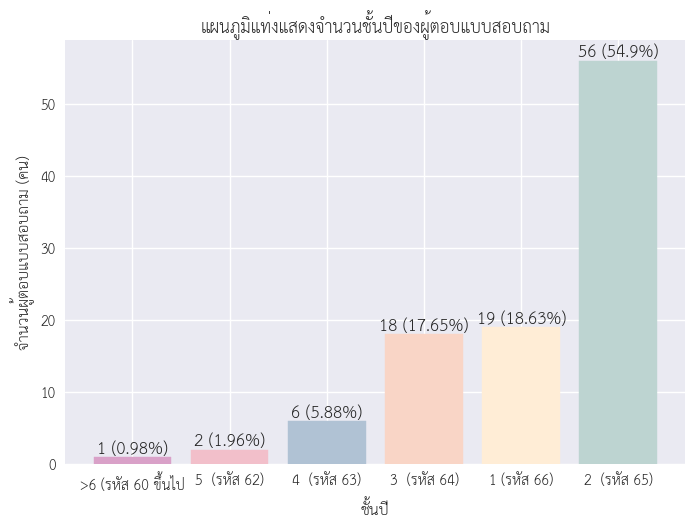

In [ ]:

plt.style.use("seaborn") # Graph style
mpl.rc('font', family='TH Sarabun New',size = 12)

# choose column ชั้นปี
data = df_year["ชั้นปี"].value_counts()

# เรียงลำดับข้อมูล
data_value = data.sort_values(ascending=True)

# Total
total_response = data_value.sum()

# คำนวณเปอร์เซ็นและจำนวน
percentage = []
for i in range(data_value.shape[0]):
    pct = (data_value[i] / total_response) * 100
    percentage.append(round(pct, 2))

# แสดงผลลัพธ์
print(data_value)
print(percentage)


# color
colors = ["#D9A1C8", "#F2BFCA","#B0C2D4", "#F9D5C6", "#FFEDD6","#BDD4D1"]

# show bar chart
bar1 = plt.bar(data_value.index, data_value.values)

# labelling data above the bar
for i in range(len(bar1)):
    height = bar1[i].get_height()
    width = bar1[i].get_width()
    plt.text(bar1[i].get_x() + width / 2.0, height,
             f'{data_value[i]:,} ({percentage[i]}%)',
             ha='center', va='bottom')

    # color
    if i < len(colors):
        bar1[i].set_color(colors[i])

# label exis
plt.xlabel("ชั้นปี")
plt.ylabel("จำนวนผู้ตอบแบบสอบถาม (คน)")
plt.title("แผนภูมิแท่งแสดงจำนวนชั้นปีของผู้ตอบแบบสอบถาม")
plt.show()


คณะ

<ipython-input-42-274611373bfb>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



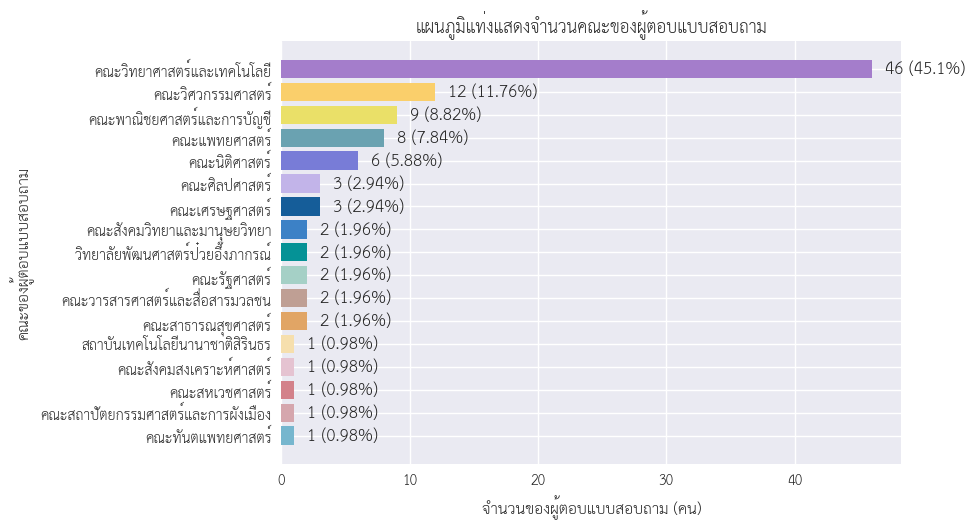

In [ ]:

plt.style.use("seaborn")  # Graph style
mpl.rc('font', family='TH Sarabun New', size=12)

# เรียงลำดับข้อมูลจากมากไปน้อย
sorted_data = df["คณะ"].value_counts().sort_values(ascending=True)

# คำนวณเปอร์เซ็นต์
percentage = []
total_responses = df.shape[0]
for value in sorted_data:
    pct = (value / total_responses) * 100
    percentage.append(round(pct, 2))

# แสดงแผนภูมิแท่ง
colors = ["#76B6CE","#D5A6AD","#D3818A","#E5C3D1","#F6DFAD","#E1A565","#BF9F94","#A5D0C6","#059296","#3C81C6","#155D99","#C2B4E9","#787CD7","#6AA2B1","#EAE068","#FACF6B","#A47DCB"]
bar1 = plt.barh(sorted_data.index, sorted_data.values, color=colors)

# ป้ายข้อมูล
for i, (index, value) in enumerate(sorted_data.items()):
    plt.text(value + 1, i, s=f'{value:,} ({percentage[i]}%)', ha='left', va='center', fontweight='bold')

# ป้ายแกน x y
plt.xlabel("จำนวนของผู้ตอบแบบสอบถาม (คน)")
plt.ylabel("คณะของผู้ตอบแบบสอบถาม")

# ชื่อแผนภูมิ
plt.title("แผนภูมิแท่งแสดงจำนวนคณะของผู้ตอบแบบสอบถาม")
plt.show()

ส่วนที่ 2 : การใช้สวัสดิการและสิ่งอำนวยความสะดวกในแต่ละด้าน

1. ด้านการเดินทางและความปลอดภัย





คุณเดินทางด้วยวิธีใดบ่อยที่สุดในการใช้ชีวิตในมหาวิทยาลัยธรรมศาสตร์

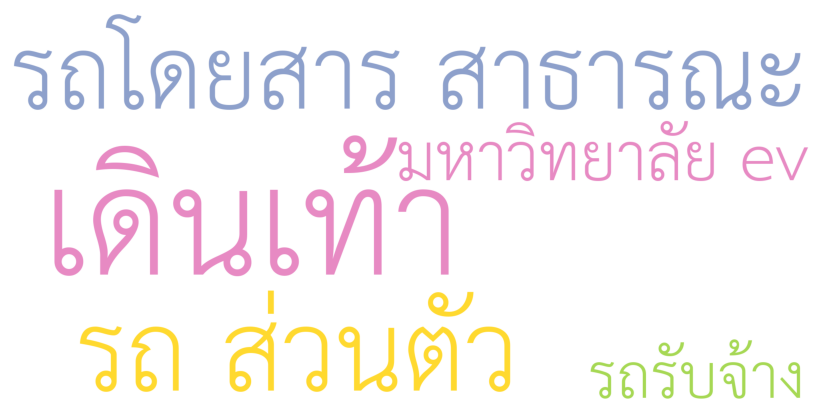

In [ ]:
# เก็บคำทั้งหมดใน column 'คุณเดินทางด้วยวิธีใดบ่อยที่สุดในการใช้ชีวิตในมหาวิทยาลัยธรรมศาสตร์'
all_words = ''

# วนลูปเพื่อนำข้อความในแต่ละแถวมาต่อกัน
for val in df1['คุณเดินทางด้วยวิธีใดบ่อยที่สุดในการใช้ชีวิตในมหาวิทยาลัยธรรมศาสตร์']:
    s = str(val)
    words = word_tokenize(s, engine='newmm')  # ใช้ตัวตัดคำ newmm สำหรับภาษาไทย
    all_words += ' '.join(words).lower().strip() + " "

# รายการคำที่ไม่ต้องการ
stopwords = thai_stopwords()

# สร้าง WordCloud
wordcloud = WordCloud(
    font_path='/content/thsarabunnew-webfont.ttf',  # ระบุ path ของ font ที่ใช้
    regexp='[ก-๙เ-๐๑-๙a-zA-Z]+',  # ใช้ Regular expression เพื่อระบุเฉพาะคำภาษาไทย
    stopwords=stopwords,  # คำที่ไม่ต้องการให้ปรากฏใน Word Cloud
    width=2000, height=1000,
    prefer_horizontal=1,
    max_words=50,
    colormap='Set2',
    background_color='white'
).generate(all_words)

# show Word Cloud
plt.figure(figsize=(8, 9))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


In [ ]:

travel_and_faculty = df1.groupby(["คุณเดินทางด้วยวิธีใดบ่อยที่สุดในการใช้ชีวิตในมหาวิทยาลัยธรรมศาสตร์","คณะ"])["คณะ"].count().reset_index(name='count')

fig=px.bar(travel_and_faculty, x=travel_and_faculty["คุณเดินทางด้วยวิธีใดบ่อยที่สุดในการใช้ชีวิตในมหาวิทยาลัยธรรมศาสตร์"], y='count', color='คณะ',
             text=[f"{100*count/len(df):.2f}%" for count in travel_and_faculty['count']], barmode='stack', color_discrete_sequence=["#76B6CE","#D5A6AD","#D3818A","#E5C3D1","#F6DFAD","#E1A565","#BF9F94","#A5D0C6","#059296","#3C81C6","#155D99","#C2B4E9","#787CD7","#6AA2B1","#EAE068","#FACF6B","#A47DCB"])

fig.update_traces(texttemplate = "%{y} (%{text})", textposition = "inside")
fig.update_layout(
    title={ 'text':"จํานวนวิธีที่นักศึกษาใช้ในการเดินทางจำแนกตามคณะ", 'x': 0.5},
    font_family="Noto Sans Thai",
    xaxis_title= "ประเภทการเดินทาง",
    yaxis_title="จำนวนนักศึกษาแบ่งตามคณะ (คน)",
    height=1000, width=1000,
    legend_title= "คณะ"
)
fig.show()




ปัญหาที่มักจะพบเจอในการใช้รถโดยสารสาธารณะของมหาวิทยาลัย (EV)

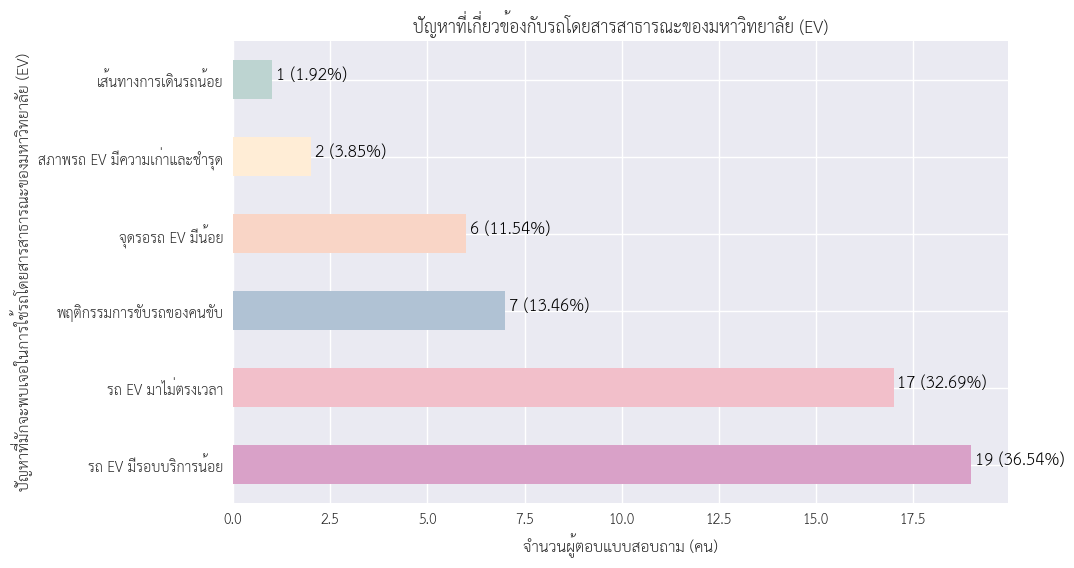

In [ ]:
# สร้างกราฟแท่งแนวนอน
plt.figure(figsize=(10, 6))
ax = df2_counts.plot(kind='barh', color=["#D9A1C8", "#F2BFCA","#B0C2D4", "#F9D5C6", "#FFEDD6","#BDD4D1"])

# เพิ่มป้ายกำกับแกน x และ y
plt.xlabel('จำนวนผู้ตอบแบบสอบถาม (คน)')
plt.ylabel('ปัญหาที่มักจะพบเจอในการใช้รถโดยสารสาธารณะของมหาวิทยาลัย (EV)')

# เพิ่มชื่อกราฟ
plt.title('ปัญหาที่เกี่ยวข้องกับรถโดยสารสาธารณะของมหาวิทยาลัย (EV)')

# แสดงจำนวนและเปอร์เซ็นต์บนแต่ละแท่ง
for i, v in enumerate(df2_counts):
    ax.text(v + 0.1, i, f'{v} ({v / df2_counts.sum() * 100:.2f}%)', color='black')

# แสดงกราฟ
plt.show()



คุณต้องการให้ทางมหาวิทยาลัยปรับปรุงแก้ไขการใช้งานรถ EV อย่างไรมากที่สุด

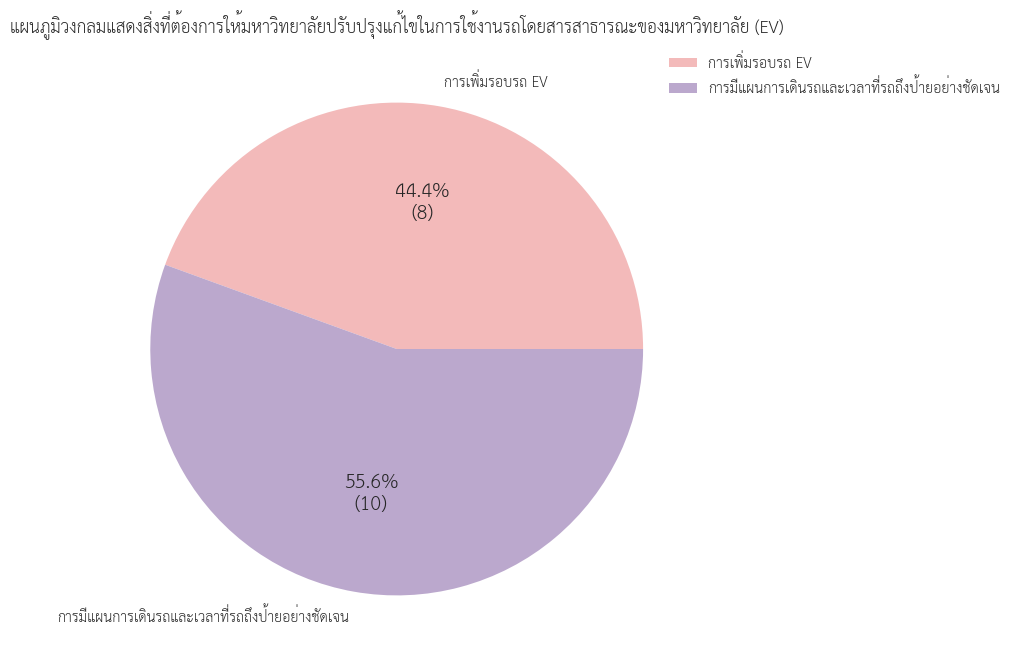

In [ ]:
mpl.rc('font', family='TH Sarabun New',size = 14)

#choose coulumn
a = df3['คุณต้องการให้ทางมหาวิทยาลัยปรับปรุงแก้ไขการใช้งานรถ EV อย่างไรมากที่สุด'].value_counts()['การเพิ่มรอบรถ EV']
b = df3['คุณต้องการให้ทางมหาวิทยาลัยปรับปรุงแก้ไขการใช้งานรถ EV อย่างไรมากที่สุด'].value_counts()['การมีแผนการเดินรถและเวลาที่รถถึงป้ายอย่างชัดเจน']

xx = np.array(['การเพิ่มรอบรถ EV','การมีแผนการเดินรถและเวลาที่รถถึงป้ายอย่างชัดเจน'])
yy = np.array([a,b])

# size of pie chart
plt.rcParams['figure.figsize'] = (10, 8)

def my_format(pct):
  total = sum(values)  # Assuming 'values' is defined elsewhere
  val = int(round(pct * total / 100.0))
  return '{:.1f}%\n({v:d})'.format(pct, v=val)

# แก้ไข
def my_format(pct):
  total = sum(yy)  # total of values
  val = int(round(pct * total / 100.0))  # calculate value
  return f'{pct:.1f}%\n({val:,d})'  # format string with percentage and value

# show pie chart
plt.pie(yy, labels=xx, autopct=my_format, colors=["#F3BABA","#BBA8CD"])
plt.legend(bbox_to_anchor=(1.5, 1))  # legend position
plt.title("แผนภูมิวงกลมแสดงสิ่งที่ต้องการให้มหาวิทยาลัยปรับปรุงแก้ไขในการใช้งานรถโดยสารสาธารณะของมหาวิทยาลัย (EV)")
plt.show()

รถ EV สายไหนที่คุณอยากให้เพิ่มจำนวนและรอบบริการมากที่สุด

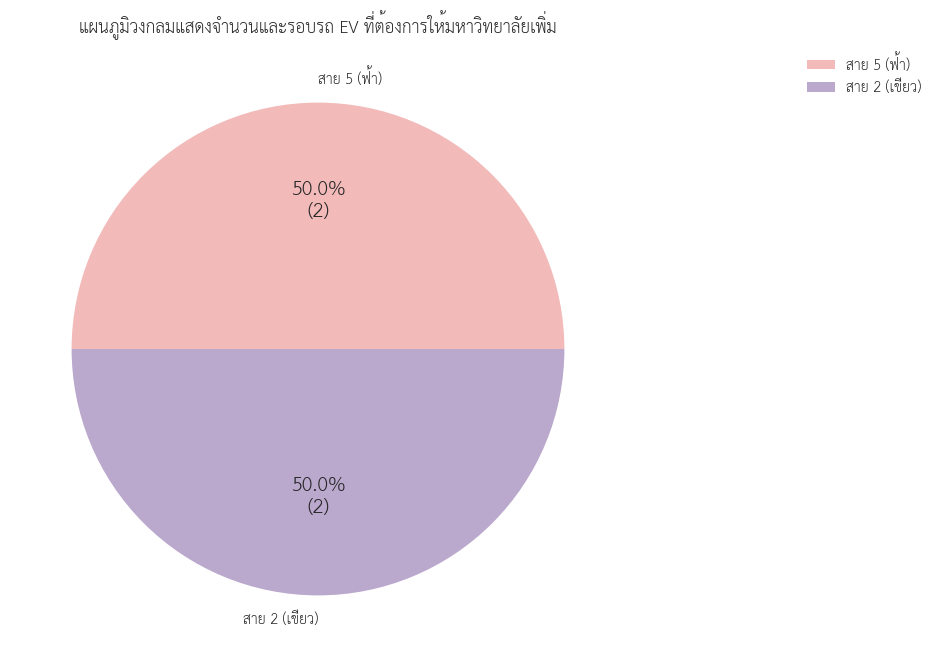

In [ ]:
mpl.rc('font', family='TH Sarabun New',size = 14)

#choose coulumn
a = df4['รถ EV สายไหนที่คุณอยากให้เพิ่มจำนวนและรอบบริการมากที่สุด'].value_counts()['สาย 5 (ฟ้า)']
b = df4['รถ EV สายไหนที่คุณอยากให้เพิ่มจำนวนและรอบบริการมากที่สุด'].value_counts()['สาย 2 (เขียว)']


xx = np.array(['สาย 5 (ฟ้า)','สาย 2 (เขียว)'])
yy = np.array([a,b])

# size of pie chart
plt.rcParams['figure.figsize'] = (10, 8)

def my_format(pct):
  total = sum(values)  # Assuming 'values' is defined elsewhere
  val = int(round(pct * total / 100.0))
  return '{:.1f}%\n({v:d})'.format(pct, v=val)

# แก้ไข
def my_format(pct):
  total = sum(yy)  # total of values
  val = int(round(pct * total / 100.0))  # calculate value
  return f'{pct:.1f}%\n({val:,d})'  # format string with percentage and value

# show pie chart
plt.pie(yy, labels=xx, autopct=my_format, colors=["#F3BABA","#BBA8CD"])
plt.legend(bbox_to_anchor=(1.5, 1))  # legend position
plt.title("แผนภูมิวงกลมแสดงจำนวนและรอบรถ EV ที่ต้องการให้มหาวิทยาลัยเพิ่ม")
plt.show()




ปัญหาที่มักพบเจอในการเดินบริเวณ cover way

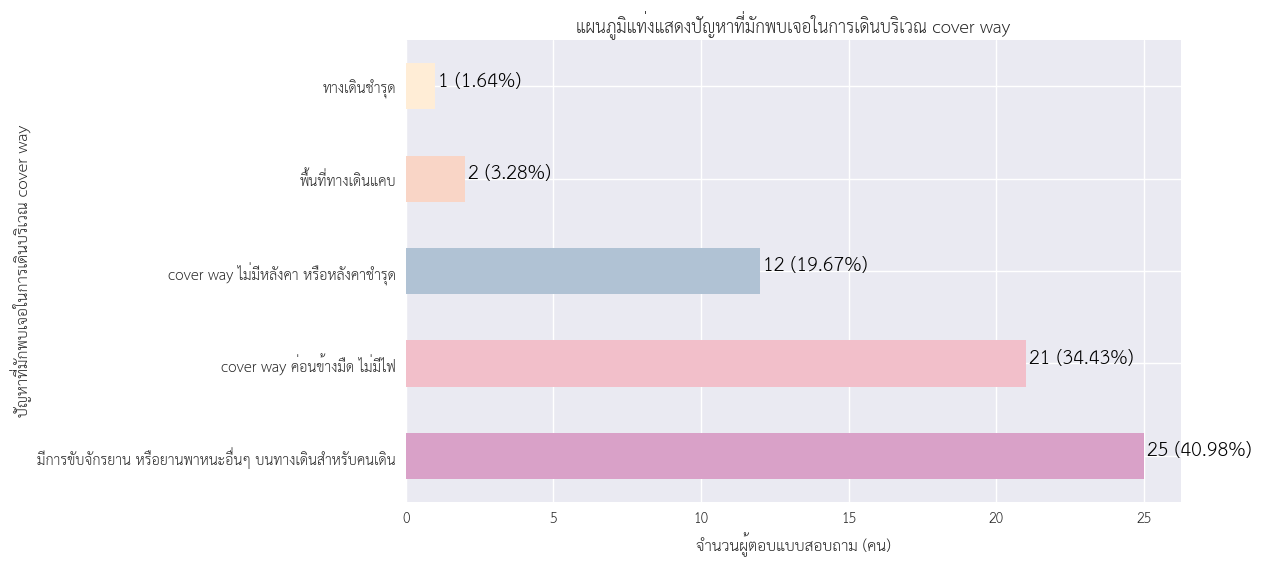

In [ ]:
# สร้างกราฟแท่งแนวนอน
plt.figure(figsize=(10, 6))
ax = df5_counts.plot(kind='barh', color=["#D9A1C8", "#F2BFCA","#B0C2D4", "#F9D5C6", "#FFEDD6"])

# เพิ่มป้ายกำกับแกน x และ y
plt.xlabel('จำนวนผู้ตอบแบบสอบถาม (คน)')
plt.ylabel('ปัญหาที่มักพบเจอในการเดินบริเวณ cover way')

# เพิ่มชื่อกราฟ
plt.title('แผนภูมิแท่งแสดงปัญหาที่มักพบเจอในการเดินบริเวณ cover way')

# แสดงจำนวนและเปอร์เซ็นต์บนแต่ละแท่ง
for i, v in enumerate(df5_counts):
    ax.text(v + 0.1, i, f'{v} ({v / df5_counts.sum() * 100:.2f}%)', color='black')

# แสดงกราฟ
plt.show()


คุณต้องการให้ทางมหาวิทยาลัยปรับปรุงแก้ไขการใช้งาน cover way อย่างไรมากที่สุด

In [ ]:
# ค้นหาชิ้นที่มีค่ามากที่สุด
max_value_index = df6_counts.idxmax()

# สร้าง list ของ explode
explode = [0.1 if label == max_value_index else 0 for label in df6_counts.index]


fig = go.Figure(go.Pie(
    values=df6_counts.values,
    labels=df6_counts.index,
    texttemplate="%{label}: %{value} <br>(%{percent})",
    textposition="outside",
    marker=dict(
        colors=["#D9A1C8", "#F2BFCA","#B0C2D4", "#F9D5C6", "#FFEDD6"]
    ),
    # กำหนด explode
    pull=[0.03 if label == max_value_index else 0 for label in df6_counts.index]
))
fig.update_layout(
    title={
        'text': "แผนภูมิวงกลมแสดงจำนวนและรอบรถ EV ที่ต้องการให้มหาวิทยาลัยเพิ่ม",
        'x': 0.5
    },
    height=900,
    width=1100,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=0.91,
        xanchor="center",
        x=0.5
    ),
    font=dict(
        family="Sarabun New, sans-serif",  # เลือกฟ้อน Sarabun New
    )
)
fig.show()



ปัญหาที่คุณมักพบเจอในการใช้บริการจักรยานหรือสกู๊ตเตอร์

<ipython-input-50-7197464c0637>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



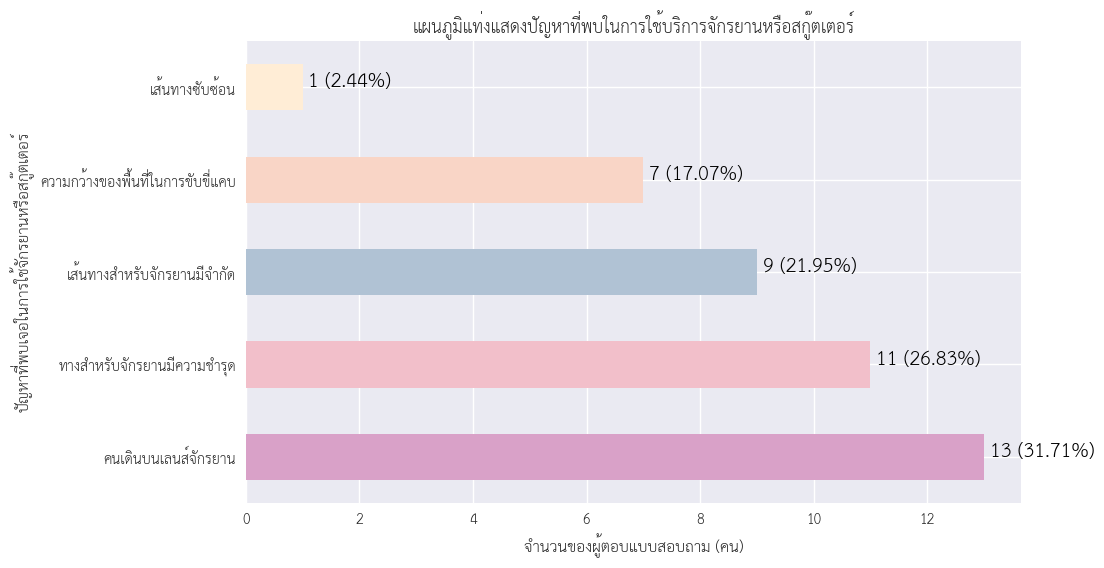

In [ ]:
plt.style.use("seaborn")  # Graph style
mpl.rc('font', family='TH Sarabun New', size=14)

# สร้างกราฟแท่งแนวนอน
plt.figure(figsize=(10, 6))
ax = df7_counts.plot(kind='barh', color=["#D9A1C8", "#F2BFCA","#B0C2D4", "#F9D5C6", "#FFEDD6"])

# เพิ่มป้ายกำกับแกน x และ y
plt.xlabel('จำนวนของผู้ตอบแบบสอบถาม (คน)')
plt.ylabel('ปัญหาที่พบเจอในการใช้จักรยานหรือสกู๊ตเตอร์')

# เพิ่มชื่อกราฟ
plt.title('แผนภูมิแท่งแสดงปัญหาที่พบในการใช้บริการจักรยานหรือสกู๊ตเตอร์')

# แสดงจำนวนและเปอร์เซ็นต์บนแต่ละแท่ง
for i, v in enumerate(df7_counts):
    ax.text(v + 0.1, i, f'{v} ({v / df7_counts.sum() * 100:.2f}%)', color='black')

# แสดงกราฟ
plt.show()



คุณต้องการให้ทางมหาวิทยาลัยมีการปรับปรุงทางจักรยานในด้านใดมากที่สุด

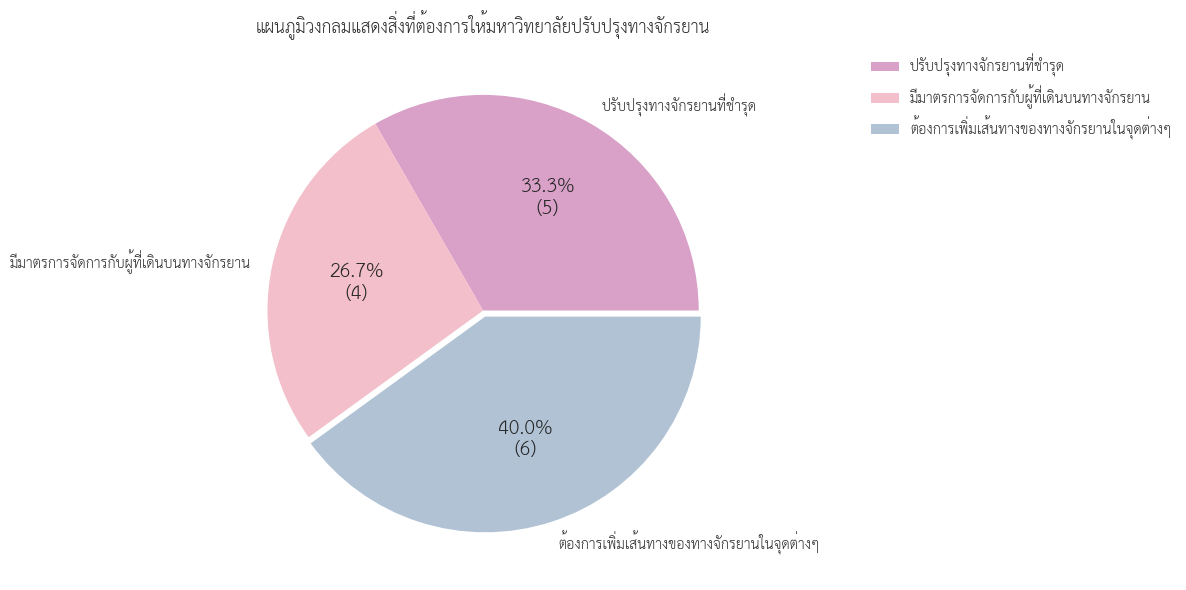

In [ ]:
plt.rc('font', family='TH Sarabun New', size=14)

# ใส่ข้อมูลจาก DataFrame
a = df8['คุณต้องการให้ทางมหาวิทยาลัยมีการปรับปรุงทางจักรยานในด้านใดมากที่สุด'].value_counts().get('ปรับปรุงทางจักรยานที่ชำรุด', 0)
b = df8['คุณต้องการให้ทางมหาวิทยาลัยมีการปรับปรุงทางจักรยานในด้านใดมากที่สุด'].value_counts().get('มีมาตรการจัดการกับผู้ที่เดินบนทางจักรยาน', 0)
c = df8['คุณต้องการให้ทางมหาวิทยาลัยมีการปรับปรุงทางจักรยานในด้านใดมากที่สุด'].value_counts().get('ต้องการเพิ่มเส้นทางของทางจักรยานในจุดต่างๆ', 0)

xx = np.array(['ปรับปรุงทางจักรยานที่ชำรุด', 'มีมาตรการจัดการกับผู้ที่เดินบนทางจักรยาน', 'ต้องการเพิ่มเส้นทางของทางจักรยานในจุดต่างๆ'])
yy = np.array([a, b, c])

# ขนาดของ Pie chart
plt.rcParams['figure.figsize'] = (10, 7)

# ฟังก์ชันสำหรับกำหนดรูปแบบของข้อความใน Pie chart
def my_format(pct, val):
    total = np.sum(yy)
    absolute = int(pct/100.*total)
    return f'{pct:.1f}%\n({absolute:,d})'

# หา index ของชิ้นข้อมูลที่มีสัดส่วนมากที่สุด
max_index = np.argmax(yy)

# กำหนด explode โดยให้ชิ้นข้อมูลที่มีสัดส่วนมากที่สุดแยกออกมา
explode = [0] * len(xx)
explode[max_index] = 0.03  # ปรับค่าน้อยหน่อยเพื่อให้ชิ้นข้อมูลที่มีสัดส่วนมากที่สุดแยกออกมา

# แสดง Pie chart โดยใช้ explode
plt.pie(yy, labels=xx, autopct=lambda pct: my_format(pct, yy), explode=explode, colors=["#D9A1C8", "#F2BFCA","#B0C2D4"])
plt.legend(bbox_to_anchor=(1.8, 1))  # ตำแหน่งของคำอธิบาย
plt.title("แผนภูมิวงกลมแสดงสิ่งที่ต้องการให้มหาวิทยาลัยปรับปรุงทางจักรยาน")
plt.show()


2. ด้านการศึกษา

คุณเคยใช้สวัสดิการและสิ่งอำนวยความสะดวกในด้านการศึกษาของมหาวิทยาลัยอะไรบ้าง

In [ ]:
mpl.rc('font', family='TH Sarabun New',size = 12),

fig = go.Figure(go.Pie(
    values=df9_counts.values,
    labels=df9_counts.index,
    texttemplate="%{label}: %{value} <br>(%{percent})",
    textposition="outside",
    hole=0.4,
    marker=dict(
        colors=["#D9A1C8", "#F2BFCA","#B0C2D4", "#F9D5C6", "#FFEDD6","#BDD4D1"]
    )
))
fig.update_layout(
    title={
        'text': "จำนวนนักศึกษาที่ใช้สวัสดิการและสิ่งอำนวยความสะดวกในด้านการศึกษา",
        'x': 0.5
    },
    height=900,
    width=1100,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.0,
        xanchor="center",
        x=0.5
    )
)
fig.show()

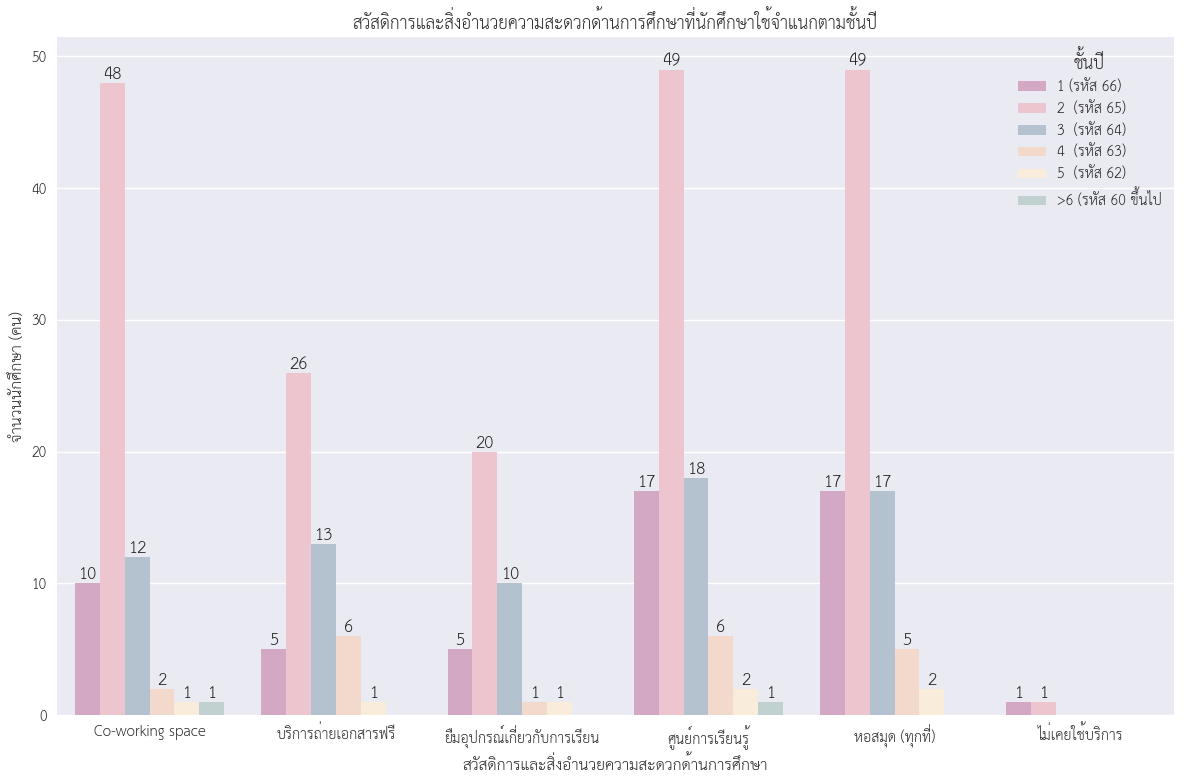

In [ ]:
# สร้างกราฟแท่งด้วย seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=df9_group, x='คุณเคยใช้สวัสดิการและสิ่งอำนวยความสะดวกในด้านการศึกษาของมหาวิทยาลัยอะไรบ้าง', y='count', hue='ชั้นปี', palette=["#D9A1C8", "#F2BFCA","#B0C2D4", "#F9D5C6", "#FFEDD6","#BDD4D1"])

# แสดงจำนวนและเปอร์เซ็นต์บนแต่ละแท่ง
for p in plt.gca().patches:
    height = p.get_height()
    if height != 0:
        plt.text(p.get_x() + p.get_width() / 2., height, f'{int(height)}', ha="center", va="bottom")

# เพิ่มป้ายกำกับแกน x และ y
plt.xlabel('สวัสดิการและสิ่งอำนวยความสะดวกด้านการศึกษา')
plt.ylabel('จำนวนนักศึกษา (คน)')

# เพิ่มชื่อกราฟ
plt.title('สวัสดิการและสิ่งอำนวยความสะดวกด้านการศึกษาที่นักศึกษาใช้จำแนกตามชั้นปี')

# แสดงกราฟ
plt.legend(title='ชั้นปี')
plt.xticks(ha='center')
plt.tight_layout()
plt.show()

คุณใช้สวัสดิการและสิ่งอำนวยความสะดวกในด้านการศึกษาของมหาวิทยาลัยใดบ่อยที่สุด

In [ ]:
# ค้นหาชิ้นที่มีค่ามากที่สุด
max_value_index = df10_counts.idxmax()

# สร้าง list ของ explode
explode = [0.1 if label == max_value_index else 0 for label in df10_counts.index]

fig = go.Figure(go.Pie(
    values=df10_counts.values,
    labels=df10_counts.index,
    texttemplate="%{label}: %{value} <br>(%{percent})",
    textposition="outside",
    marker=dict(
        colors=["#D9A1C8", "#F2BFCA","#B0C2D4", "#F9D5C6", "#FFEDD6","#BDD4D1"]
    ),
    # กำหนด explode
    pull=[0.03 if label == max_value_index else 0 for label in df10_counts.index]
))
fig.update_layout(
    title={
        'text': "สวัสดิการและสิ่งอำนวยความสะดวกในด้านการศึกษาที่นักศึกษาใช้บ่อยที่สุด",
        'x': 0.5
    },
    height=900,
    width=1100,
    legend=dict(
        #title="สวัสดิการและสิ่งอำนวยความสะดวกในด้านการศึกษา",
        orientation="h",
        yanchor="bottom",
        y=1.0,
        xanchor="center",
        x=0.5
    )
)
fig.show()

คุณต้องการให้ทางมหาวิทยาลัยเพิ่มจำนวนหรือปรับปรุงสวัสดิการและสิ่งอำนวยความสะดวกในการศึกษาของมหาวิทยาลัยอะไรมากที่สุด

In [ ]:
# ค้นหาชิ้นที่มีค่ามากที่สุด
max_value_index = df11_counts.idxmax()

# สร้าง list ของ explode
explode = [0.1 if label == max_value_index else 0 for label in df11_counts.index]

fig = go.Figure(go.Pie(
    values=df11_counts.values,
    labels=df11_counts.index,
    texttemplate="%{label}: %{value} <br>(%{percent})",
    textposition="outside",
    marker=dict(
        colors=["#D9A1C8", "#F2BFCA","#B0C2D4", "#F9D5C6", "#FFEDD6","#BDD4D1"]
    ),
    pull=[0.03 if label == max_value_index else 0 for label in df11_counts.index]
))
fig.update_layout(
    title={
        'text': "สวัสดิการและสิ่งอำนวยความสะดวกในด้านการศึกษาที่ต้องการให้เพิ่มจำนวนหรือปรับปรุงมากที่สุด",
        'x': 0.5
    },
    height=900,
    width=1100,
    legend=dict(
        #title="สิ่งที่ต้องการเพิ่มหรือปรับปรุง",
        orientation="h",
        yanchor="bottom",
        y=1.0,
        xanchor="center",
        x=0.5
    )
)
fig.show()

3. ด้านสุขภาพ

คุณเคยใช้สิทธิหรือสวัสดิการอะไรบ้างเกี่ยวกับด้านสุขภาพ

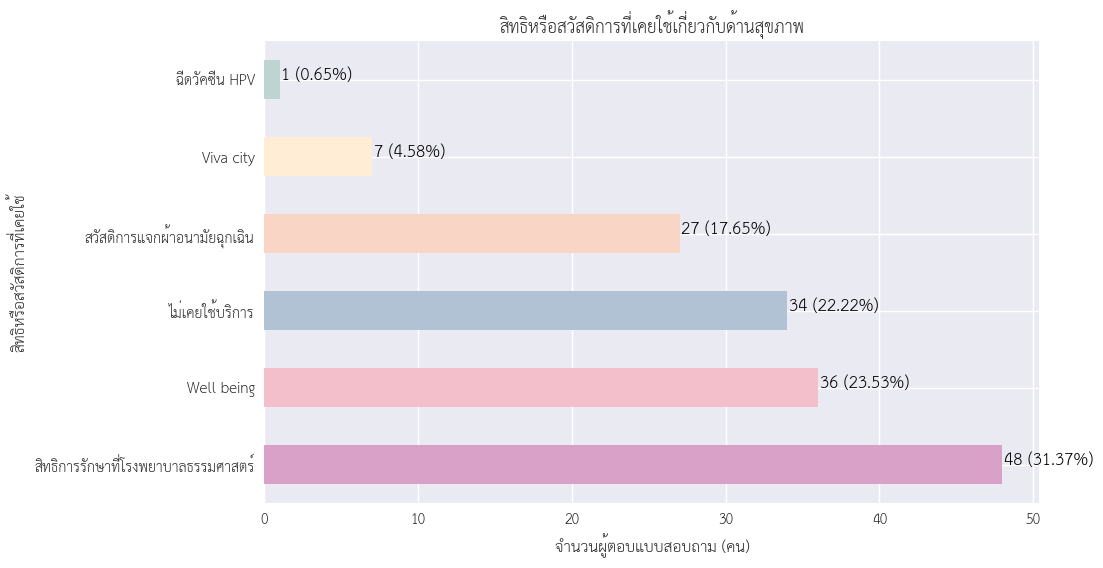

In [ ]:
# สร้างกราฟแท่งแนวนอน
plt.figure(figsize=(10, 6))
ax = df12_counts.plot(kind='barh', color=["#D9A1C8", "#F2BFCA","#B0C2D4", "#F9D5C6", "#FFEDD6","#BDD4D1"])

# เพิ่มป้ายกำกับแกน x และ y
plt.xlabel('จำนวนผู้ตอบแบบสอบถาม (คน)')
plt.ylabel('สิทธิหรือสวัสดิการที่เคยใช้')

# เพิ่มชื่อกราฟ
plt.title('สิทธิหรือสวัสดิการที่เคยใช้เกี่ยวกับด้านสุขภาพ')

# แสดงจำนวนและเปอร์เซ็นต์บนแต่ละแท่ง
for i, v in enumerate(df12_counts):
    ax.text(v + 0.1, i, f'{v} ({v / df12_counts.sum() * 100:.2f}%)', color='black')

# แสดงกราฟ
plt.show()

คุณใช้สิทธิหรือสวัสดิการเกี่ยวกับด้านสุขภาพใดบ่อยที่สุด

In [ ]:
# ค้นหาชิ้นที่มีค่ามากที่สุด
max_value_index = df13_counts.idxmax()

# สร้าง list ของ explode
explode = [0.1 if label == max_value_index else 0 for label in df13_counts.index]

fig = go.Figure(go.Pie(
    values=df13_counts.values,
    labels=df13_counts.index,
    texttemplate="%{label}: %{value} <br>(%{percent})",
    textposition="outside",
    marker=dict(
        colors=["#D9A1C8", "#F2BFCA","#B0C2D4", "#F9D5C6", "#FFEDD6","#BDD4D1"]
    ),
    # กำหนด explode
    pull=[0.03 if label == max_value_index else 0 for label in df13_counts.index]
))
fig.update_layout(
    title={
        'text': "คุณใช้สิทธิหรือสวัสดิการเกี่ยวกับด้านสุขภาพใดบ่อยที่สุด",
        'x': 0.5
    },
    height=900,
    width=1100,
    legend=dict(
        #title="สวัสดิการและสิ่งอำนวยความสะดวกในด้านการศึกษา",
        orientation="h",
        yanchor="bottom",
        y=1.0,
        xanchor="center",
        x=0.5
    )
)
fig.show()

คุณต้องการให้ทางมหาวิทยาลัยปรับปรุงสวัสดิการและสิ่งอำนวยความสะดวกในด้านสุขภาพอย่างไรบ้าง

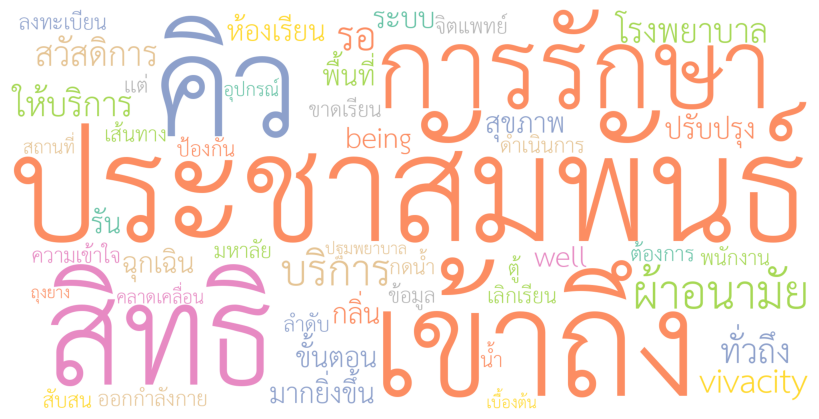

In [ ]:
# เก็บคำทั้งหมดใน column
all_words = ''

# วนลูปเพื่อนำข้อความในแต่ละแถวมาต่อกัน
for val in df14:
    s = str(val)
    words = word_tokenize(s, engine='newmm')  # ใช้ตัวตัดคำ newmm สำหรับภาษาไทย
    all_words += ' '.join(words).lower().strip() + " "

# รายการคำที่ไม่ต้องการ
stopwords =  thai_stopwords() | {'ไม่มี','ตอนนี้', 'ไม่ต้อง', 'มากขึ้น', 'นศ', 'จุด', 'สำหรับ', 'แต่', 'ขยาย', 'ดีกว่า', 'คน', 'หลากหลาย',
                                 'มากยิ่งขึ้น' 'แจก', 'สุข', 'นักศึกษา', 'ต', 'น', 'ฟรี', 'ดีขึ้น', 'ภา', 'ศสา', 'เกินไป', 'ปกติ',
                                 'มร', 'ณรอ', 'ลด', 'ตรงนี้', 'ข้อ', 'ถพบ', 'ในระหว่างนั้น', 'เป็นประจำ', 'ชัดเจน', 'เกี่ยง'}

# สร้าง WordCloud
wordcloud = WordCloud(
    font_path='/content/thsarabunnew-webfont.ttf',  # ระบุ path ของ font ที่ใช้
    regexp='[ก-๙เ-๐๑-๙a-zA-Z]+',  # ใช้ Regular expression เพื่อระบุเฉพาะคำภาษาไทย
    stopwords=stopwords,  # คำที่ไม่ต้องการให้ปรากฏใน Word Cloud
    width=2000, height=1000,
    prefer_horizontal=1,
    max_words=50,
    colormap='Set2',
    background_color='white'
).generate(all_words)

# show Word Cloud
plt.figure(figsize=(8, 9))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

คุณต้องการให้ทางมหาวิทยาลัยมีการเพิ่มจุดแจกผ้าอนามัยฉุกเฉินเพิ่มขึ้นหรือไม่

In [ ]:
mpl.rc('font', family='TH Sarabun New',size = 12),

fig = go.Figure(go.Pie(
    values=df15_counts.values,
    labels=df15_counts.index,
    texttemplate="%{label}: %{value} <br>(%{percent})",
    textposition="outside",
    hole=0.4,
    marker=dict(
        colors=["#F3BABA","#BBA8CD"]
    )
))
fig.update_layout(
    title={
        'text': "จำนวนนักศึกษาที่ต้องการให้เพิ่มจุดแจกผ้าอนามัย",
        'x': 0.5
    },
    height=900,
    width=1100,
    legend=dict(
        #title="ความต้องการ",
        orientation="h",
        yanchor="bottom",
        y=1,
        xanchor="center",
        x=0.9
    )
)
fig.show()

บริเวณสถานที่ใดบ้างที่คุณต้องการให้มีการเพิ่มจุดแจกผ้าอนามัยฟรี


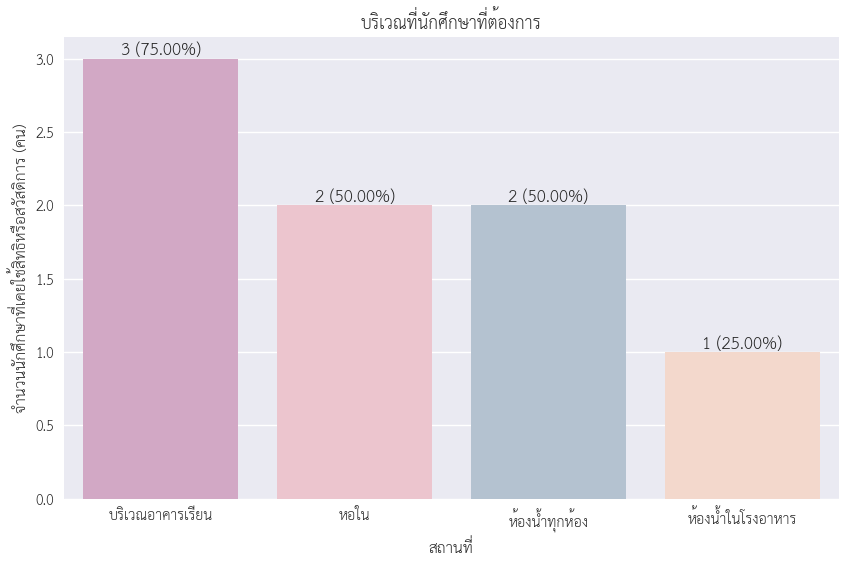

In [ ]:
# สร้างกราฟแท่งแนวตั้งด้วย seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df16_counts.index, y=df16_counts, hue=df16_counts.index, dodge=False, palette=["#D9A1C8", "#F2BFCA","#B0C2D4", "#F9D5C6"])

# แสดงเปอร์เซ็นต์บนแต่ละแท่ง
total = len(df16_counts)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{int(height)} ({height / total:.2%})', ha="center", va="bottom")

# เพิ่มป้ายกำกับแกน x และ y
plt.xlabel('สถานที่')
plt.ylabel('จำนวนนักศึกษาที่เคยใช้สิทธิหรือสวัสดิการ (คน)')

# เพิ่มชื่อกราฟ
plt.title('บริเวณที่นักศึกษาที่ต้องการ')

# แสดงกราฟ
plt.show()


4. ด้านสิ่งแวดล้อม

สิ่งแวดล้อมในมหาวิทยาลัยที่คุณคิดว่าควรปรับปรุงให้ดีขึ้นคืออะไร

<ipython-input-61-07f5e412c9d3>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



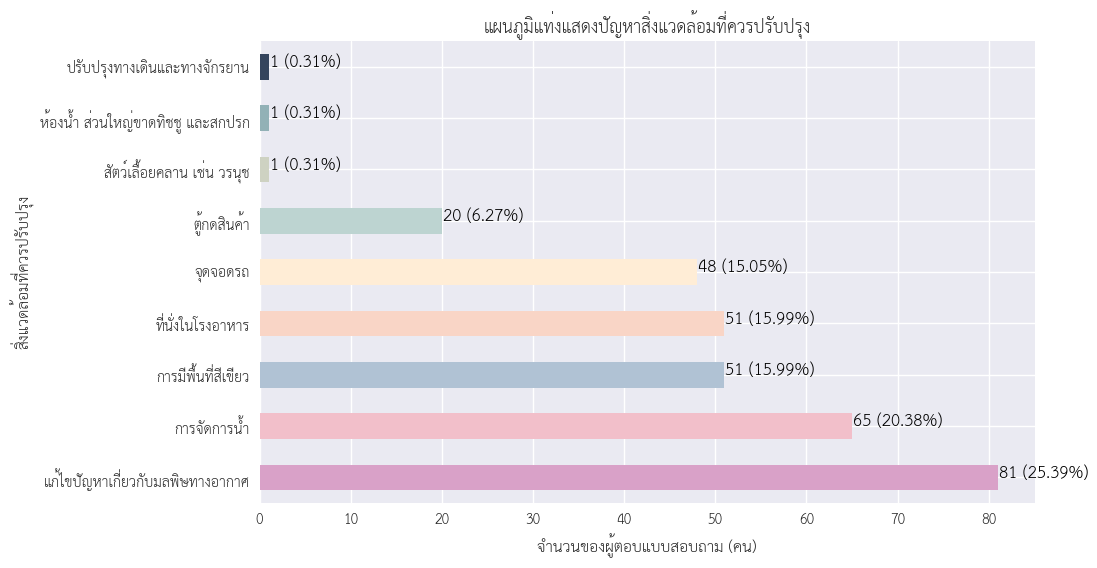

In [ ]:
plt.style.use("seaborn")  # Graph style
mpl.rc('font', family='TH Sarabun New', size=14)

# สร้างกราฟแท่งแนวนอน
plt.figure(figsize=(10, 6))
ax = df17_counts.plot(kind='barh', color=["#D9A1C8", "#F2BFCA","#B0C2D4", "#F9D5C6", "#FFEDD6","#BDD4D1","#CED2C2","#92B1B6","#35455D"])

# เพิ่มป้ายกำกับแกน x และ y
plt.xlabel('จำนวนของผู้ตอบแบบสอบถาม (คน)')
plt.ylabel('สิ่งแวดล้อมที่ควรปรับปรุง')

# เพิ่มชื่อกราฟ
plt.title('แผนภูมิแท่งแสดงปัญหาสิ่งแวดล้อมที่ควรปรับปรุง')

# แสดงจำนวนและเปอร์เซ็นต์บนแต่ละแท่ง
for i, v in enumerate(df17_counts):
    ax.text(v + 0.1, i, f'{v} ({v / df17_counts.sum() * 100:.2f}%)', color='black' , fontsize=12)

# แสดงกราฟ
plt.show()

สิ่งแวดล้อมในมหาวิทยาลัยที่อยากให้ปรับปรุงเป็นอันดับแรก

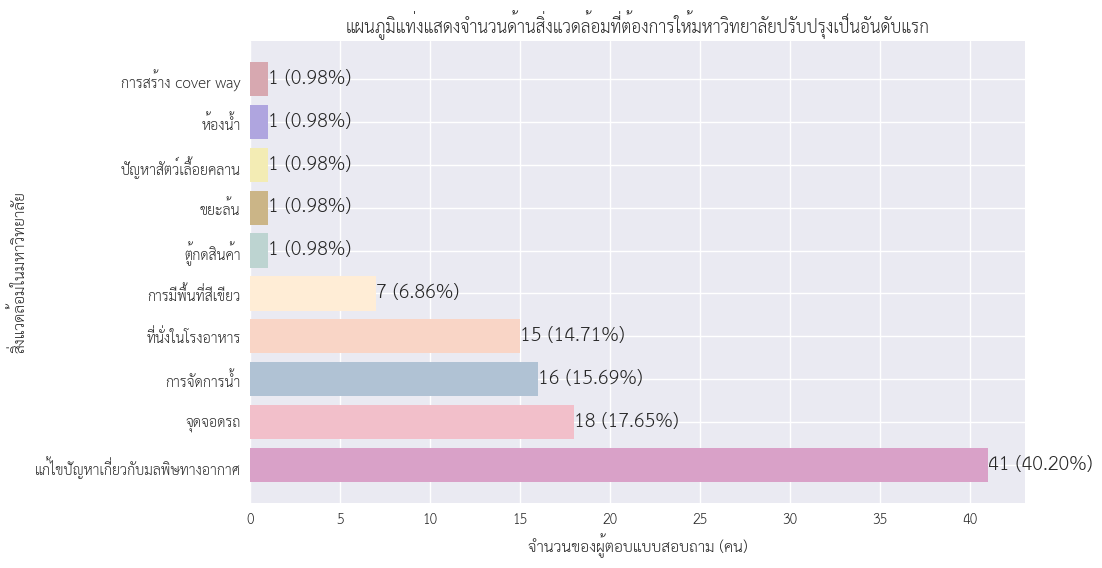

In [ ]:

# สร้างข้อมูลจำนวนและเปอร์เซ็นต์
categories = ['การมีพื้นที่สีเขียว', 'การจัดการน้ำ', 'แก้ไขปัญหาเกี่ยวกับมลพิษทางอากาศ', 'จุดจอดรถ', 'ตู้กดสินค้า', 'ที่นั่งในโรงอาหาร', 'ขยะล้น', 'ปัญหาสัตว์เลื้อยคลาน', 'ห้องน้ำ', 'การสร้าง cover way']
counts = [df18[df18['สิ่งแวดล้อมในมหาวิทยาลัยที่อยากให้ปรับปรุงเป็นอันดับแรก'].str.contains(cat)].shape[0] for cat in categories]

# หาค่ามากที่สุด 3 อันดับ และเรียงลำดับ
sorted_indices = sorted(range(len(counts)), key=lambda i: counts[i], reverse=True)
top_categories = [categories[i] for i in sorted_indices[:3]]
top_values = [counts[i] for i in sorted_indices[:3]]
categories = [categories[i] for i in sorted_indices]
counts = [counts[i] for i in sorted_indices]

# สร้าง Bar Chart
plt.figure(figsize=(10, 6))
bars = plt.barh(categories, counts, color=["#D9A1C8", "#F2BFCA","#B0C2D4", "#F9D5C6", "#FFEDD6","#BDD4D1","#CBB587","#F3ECB4","#AFA5DF","#D7A8B0"])  # กำหนดสีแท่งทั้งหมด
plt.xlabel('จำนวนของผู้ตอบแบบสอบถาม (คน)')
plt.ylabel('สิ่งแวดล้อมในมหาวิทยาลัย')
plt.title('แผนภูมิแท่งแสดงจำนวนด้านสิ่งแวดล้อมที่ต้องการให้มหาวิทยาลัยปรับปรุงเป็นอันดับแรก')

# เพิ่มข้อความจำนวนและเปอร์เซ็นต์ลงบนแต่ละแท่ง
for i, count in enumerate(counts):
    plt.text(count, i, f'{count} ({count/sum(counts)*100:.2f}%)', ha='left', va='center')

plt.show()



คุณต้องการให้ทางมหาวิทยาลัยมีการแก้ไขและปรับปรุงเพิ่มเติมอย่างไร

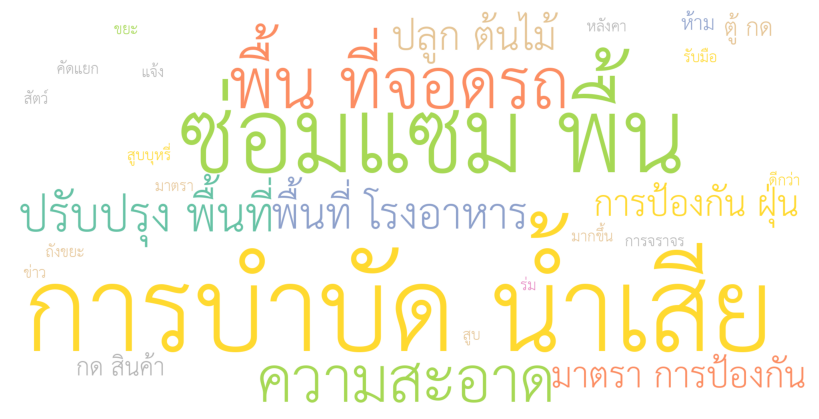

In [ ]:
all_words = ''

# วนลูปเพื่อนำข้อความในแต่ละแถวมาต่อกัน
for val in df19:
    s = str(val)
    words = word_tokenize(s, engine='newmm')  # ใช้ตัวตัดคำ newmm สำหรับภาษาไทย
    all_words += ' '.join(words).lower().strip() + " "

# รายการคำที่ไม่ต้องการ
stopwords = thai_stopwords()

# สร้าง WordCloud
wordcloud = WordCloud(
    font_path='/content/thsarabunnew-webfont.ttf',  # ระบุ path ของ font ที่ใช้
    regexp='[ก-๙เ-๐๑-๙a-zA-Z]+',  # ใช้ Regular expression เพื่อระบุเฉพาะคำภาษาไทย
    stopwords=stopwords,  # คำที่ไม่ต้องการให้ปรากฏใน Word Cloud
    width=2000, height=1000,
    prefer_horizontal=1,
    max_words=50,
    colormap='Set2',
    background_color='white'
).generate(all_words)

# show Word Cloud
plt.figure(figsize=(8, 9))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

5. ด้านอิ่นๆ

คุณต้องการให้มหาวิทยาลัยปรับปรุงสวัสดิการและสิ่งอำนวยความสะดวกในด้านใดเพิ่มเติม

<ipython-input-64-495f1a017e24>:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



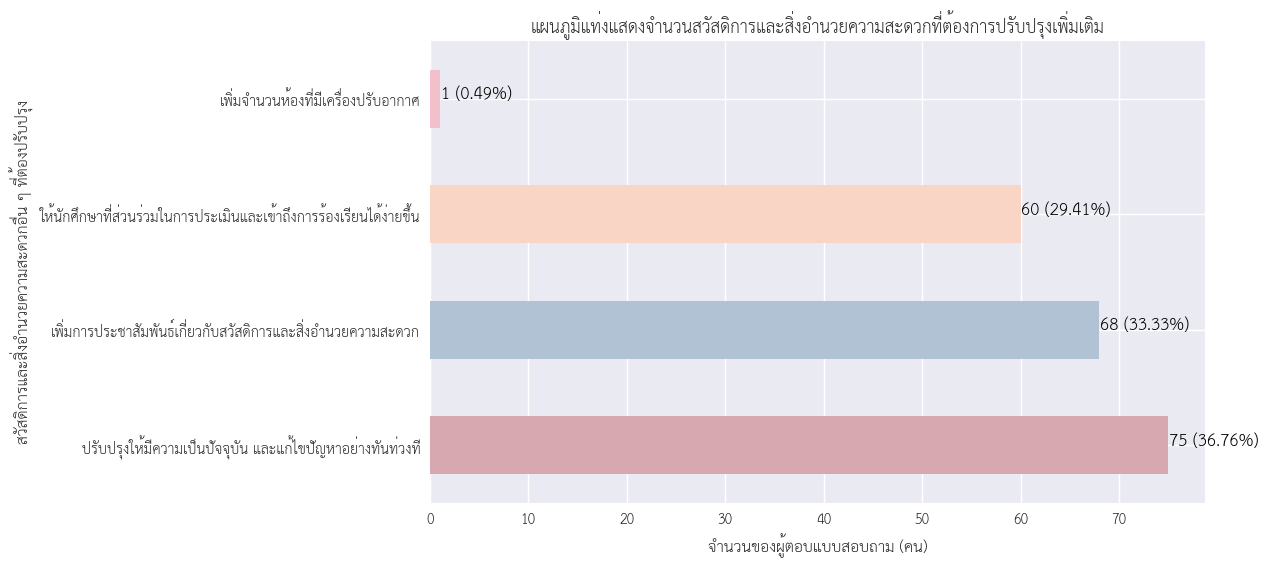

In [ ]:
plt.style.use("seaborn")  # Graph style
mpl.rc('font', family='TH Sarabun New', size=14)

# สร้างกราฟแท่งแนวนอน
plt.figure(figsize=(10, 6))
ax = df20_counts.plot(kind='barh', color=["#D7A8B0","#B0C2D4", "#F9D5C6","#F2BFCA" ])

# เพิ่มป้ายกำกับแกน x และ y
plt.xlabel('จำนวนของผู้ตอบแบบสอบถาม (คน)')
plt.ylabel('สวัสดิการและสิ่งอำนวยความสะดวกอื่น ๆ ที่ต้องปรับปรุง')

# เพิ่มชื่อกราฟ
plt.title('แผนภูมิแท่งแสดงจำนวนสวัสดิการและสิ่งอำนวยความสะดวกที่ต้องการปรับปรุงเพิ่มเติม')

# แสดงจำนวนและเปอร์เซ็นต์บนแต่ละแท่ง
for i, v in enumerate(df20_counts):
    ax.text(v + 0.1, i, f'{v} ({v / df20_counts.sum() * 100:.2f}%)', color='black' , fontsize=12)

# แสดงกราฟ
plt.show()

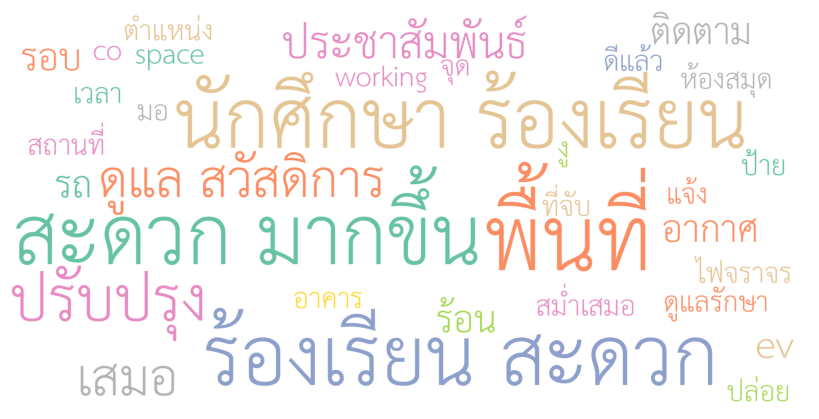

In [ ]:
all_words = ''

# วนลูปเพื่อนำข้อความในแต่ละแถวมาต่อกัน
for val in df21:
    s = str(val)
    words = word_tokenize(s, engine='newmm')  # ใช้ตัวตัดคำ newmm สำหรับภาษาไทย
    all_words += ' '.join(words).lower().strip() + " "

# รายการคำที่ไม่ต้องการ
stopwords = thai_stopwords()

# สร้าง WordCloud
wordcloud = WordCloud(
    font_path='/content/thsarabunnew-webfont.ttf',  # ระบุ path ของ font ที่ใช้
    regexp='[ก-๙เ-๐๑-๙a-zA-Z]+',  # ใช้ Regular expression เพื่อระบุเฉพาะคำภาษาไทย
    stopwords=stopwords,  # คำที่ไม่ต้องการให้ปรากฏใน Word Cloud
    width=2000, height=1000,
    prefer_horizontal=1,
    max_words=50,
    colormap='Set2',
    background_color='white'
).generate(all_words)

# show Word Cloud
plt.figure(figsize=(8, 9))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

ส่วนที่ 3 : ความพึงพอใจต่อสวัสดิการแต่ละด้าน

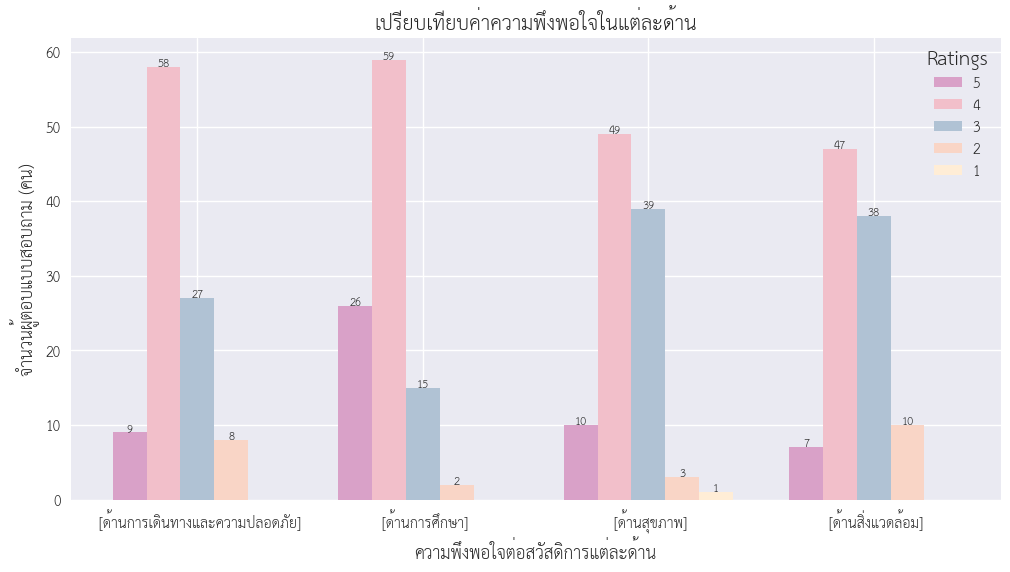

In [ ]:
# ข้อมูลที่ต้องการเปรียบเทียบ
categories = [' [ด้านการเดินทางและความปลอดภัย]', ' [ด้านการศึกษา]', ' [ด้านสุขภาพ]', ' [ด้านสิ่งแวดล้อม]']
count_5 = df[' [ด้านการเดินทางและความปลอดภัย]'].value_counts().get(5, 0)
count_4 = df[' [ด้านการเดินทางและความปลอดภัย]'].value_counts().get(4, 0)
count_3 = df[' [ด้านการเดินทางและความปลอดภัย]'].value_counts().get(3, 0)
count_2 = df[' [ด้านการเดินทางและความปลอดภัย]'].value_counts().get(2, 0)
count_1 = df[' [ด้านการเดินทางและความปลอดภัย]'].value_counts().get(1, 0)

count_51 = df[' [ด้านการศึกษา]'].value_counts().get(5, 0)
count_41 = df[' [ด้านการศึกษา]'].value_counts().get(4, 0)
count_31 = df[' [ด้านการศึกษา]'].value_counts().get(3, 0)
count_21 = df[' [ด้านการศึกษา]'].value_counts().get(2, 0)
count_11 = df[' [ด้านการศึกษา]'].value_counts().get(1, 0)

count_52 = df[' [ด้านสุขภาพ]'].value_counts().get(5, 0)
count_42 = df[' [ด้านสุขภาพ]'].value_counts().get(4, 0)
count_32 = df[' [ด้านสุขภาพ]'].value_counts().get(3, 0)
count_22 = df[' [ด้านสุขภาพ]'].value_counts().get(2, 0)
count_12 = df[' [ด้านสุขภาพ]'].value_counts().get(1, 0)

count_53 = df[' [ด้านสิ่งแวดล้อม]'].value_counts().get(5, 0)
count_43 = df[' [ด้านสิ่งแวดล้อม]'].value_counts().get(4, 0)
count_33 = df[' [ด้านสิ่งแวดล้อม]'].value_counts().get(3, 0)
count_23 = df[' [ด้านสิ่งแวดล้อม]'].value_counts().get(2, 0)
count_13 = df[' [ด้านสิ่งแวดล้อม]'].value_counts().get(1, 0)

counts_5 = [count_5, count_51, count_52, count_53]
counts_4 = [count_4, count_41, count_42, count_43]
counts_3 = [count_3, count_31, count_32, count_33]
counts_2 = [count_2, count_21, count_22, count_23]
counts_1 = [count_1, count_11, count_12, count_13]

# กำหนดสีของแต่ละบาร์
colors = ["#D9A1C8", "#F2BFCA", "#B0C2D4", "#F9D5C6", "#FFEDD6", "#BDD4D1", "#BE8294"]

# กำหนดขนาดของกราฟ
plt.figure(figsize=(12, 6))

# สร้างชุดข้อมูลสำหรับแต่ละกลุ่ม
x = range(len(categories))
plt.bar(x, counts_5, width=0.15, label='5', color=colors[0])
plt.bar([i + 0.15 for i in x], counts_4, width=0.15, label='4', color=colors[1])
plt.bar([i + 0.30 for i in x], counts_3, width=0.15, label='3', color=colors[2])
plt.bar([i + 0.45 for i in x], counts_2, width=0.15, label='2', color=colors[3])
plt.bar([i + 0.60 for i in x], counts_1, width=0.15, label='1', color=colors[4])

# เพิ่มรายละเอียดบนแต่ละแท่ง
for i in x:
    if counts_5[i] != 0:
        plt.text(i, counts_5[i] + 0.1, str(counts_5[i]), fontsize=8, ha='center')
    if counts_4[i] != 0:
        plt.text(i + 0.15, counts_4[i] + 0.1, str(counts_4[i]), fontsize=8, ha='center')
    if counts_3[i] != 0:
        plt.text(i + 0.30, counts_3[i] + 0.1, str(counts_3[i]), fontsize=8, ha='center')
    if counts_2[i] != 0:
        plt.text(i + 0.45, counts_2[i] + 0.1, str(counts_2[i]), fontsize=8, ha='center')
    if counts_1[i] != 0:
        plt.text(i + 0.60, counts_1[i] + 0.1, str(counts_1[i]), fontsize=8, ha='center')

# เพิ่มรายละเอียดกราฟ
plt.xlabel('ความพึงพอใจต่อสวัสดิการแต่ละด้าน', fontsize=12)
plt.ylabel('จำนวนผู้ตอบแบบสอบถาม (คน)', fontsize=12)
plt.title('เปรียบเทียบค่าความพึงพอใจในแต่ละด้าน', fontsize=14)
plt.xticks([i + 0.3 for i in x], categories, fontsize=10)
plt.legend(title='Ratings', fontsize=10)

# แสดงกราฟ
plt.show()


In [ ]:
mean_values = df[[' [ด้านการเดินทางและความปลอดภัย]', ' [ด้านการศึกษา]', ' [ด้านสุขภาพ]', ' [ด้านสิ่งแวดล้อม]']].mean()
mean_values = mean_values.round(2)
print(mean_values)

fig = make_subplots(rows=1, cols=4, subplot_titles=list(mean_values.keys()), specs=[[{'type': 'indicator'}]*4])

for i, (column, value) in enumerate(mean_values.items(), 1):
    fig.add_trace(go.Indicator(
        mode="gauge+number",
        value=value,
        gauge={
            'axis': {'range': [1, 5], 'tickfont': {'size': 12}},
            'bar': {'color': "#F5B7B1"},
            'threshold': {
                'line': {'color': "#B2BABB", 'width': 3},
                'thickness': 0.8,
                'value': value}
        },
    ), row=1, col=i)

fig.update_layout(height=400, title_text="ค่าเฉลี่ยความพึงพอใจต่อสวัสดิการและสิง่อำนวยความสะดวก")
fig.show()

 [ด้านการเดินทางและความปลอดภัย]    3.67
 [ด้านการศึกษา]                    4.07
 [ด้านสุขภาพ]                      3.63
 [ด้านสิ่งแวดล้อม]                 3.50
dtype: float64


อันดับความสำคัญของสวัสดิการแต่ละด้าน

In [ ]:
!pip install squarify # ติดตั้ง Python ที่ชื่อ squarify เพื่อใช้ทำ tree map

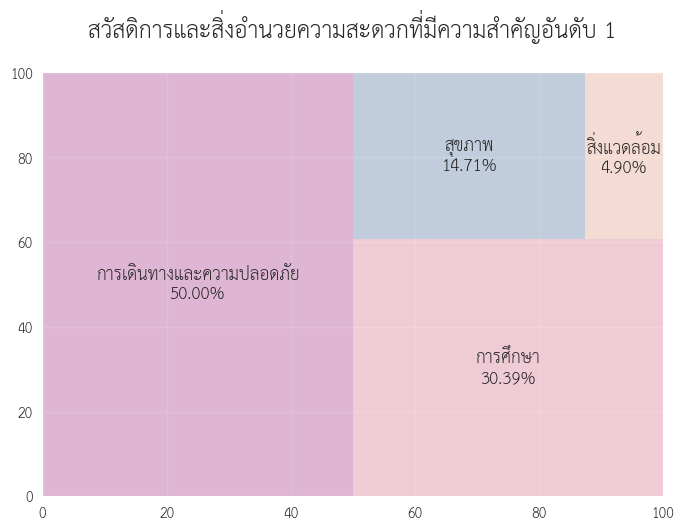

In [ ]:
import squarify

# นับจำนวนความถี่ของข้อมูลในแต่ละหมวดหมู่
a1 = df['1. สวัสดิการและสิ่งอำนวยความสะดวกที่สำคัญอันดับ 1'].value_counts()['ด้านการเดินทางและความปลอดภัย']
b1 = df['1. สวัสดิการและสิ่งอำนวยความสะดวกที่สำคัญอันดับ 1'].value_counts()['ด้านการศึกษา']
c1 = df['1. สวัสดิการและสิ่งอำนวยความสะดวกที่สำคัญอันดับ 1'].value_counts()['ด้านสุขภาพ']
d1 = df['1. สวัสดิการและสิ่งอำนวยความสะดวกที่สำคัญอันดับ 1'].value_counts()['ด้านสิ่งแวดล้อม']

# สร้างข้อมูลจำนวนแต่ละหมวดหมู่
categories = ['การเดินทางและความปลอดภัย', 'การศึกษา', 'สุขภาพ', 'สิ่งแวดล้อม']
counts = [a1, b1, c1, d1]

# คำนวณเปอร์เซ็นต์
total = sum(counts)
percentages = [(count / total) * 100 for count in counts]

# การแยกสีสำหรับแต่ละส่วนของ tree map
colors = ["#D9A1C8", "#F2BFCA", "#B0C2D4", "#F9D5C6"]  # เปลี่ยนสีตามที่ต้องการ
plt.rcParams.update({'font.size': 12})

# สร้าง tree map
squarify.plot(sizes=percentages, label=[f'{categories[i]}\n{percentages[i]:.2f}%' for i in range(len(categories))], color=colors, alpha=0.7)
plt.title('สวัสดิการและสิ่งอำนวยความสะดวกที่มีความสำคัญอันดับ 1\n',  size=16)  # เพิ่มชื่อกราฟ

plt.show()


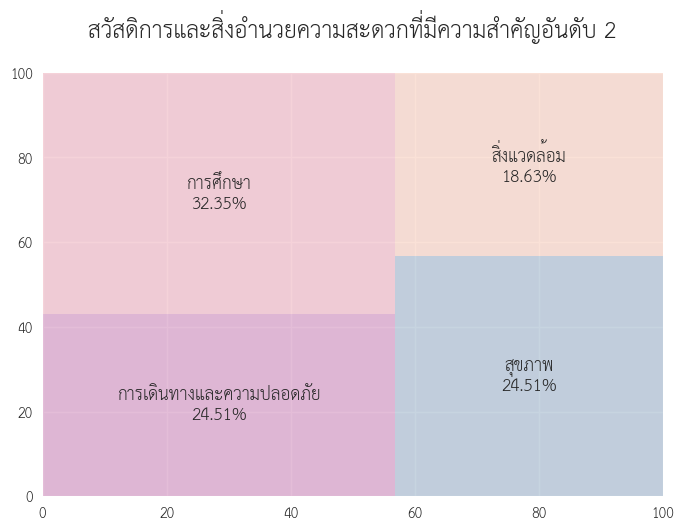

In [ ]:
# นับจำนวนความถี่ของข้อมูลในแต่ละหมวดหมู่
a2 = df['2. สวัสดิการและสิ่งอำนวยความสะดวกที่สำคัญอันดับ 2'].value_counts()['ด้านการเดินทางและความปลอดภัย']
b2 = df['2. สวัสดิการและสิ่งอำนวยความสะดวกที่สำคัญอันดับ 2'].value_counts()['ด้านการศึกษา']
c2 = df['2. สวัสดิการและสิ่งอำนวยความสะดวกที่สำคัญอันดับ 2'].value_counts()['ด้านสุขภาพ']
d2 = df['2. สวัสดิการและสิ่งอำนวยความสะดวกที่สำคัญอันดับ 2'].value_counts()['ด้านสิ่งแวดล้อม']

# สร้างข้อมูลจำนวนแต่ละหมวดหมู่
categories = ['การเดินทางและความปลอดภัย', 'การศึกษา', 'สุขภาพ', 'สิ่งแวดล้อม']
counts = [a2, b2, c2, d2]

# คำนวณเปอร์เซ็นต์
total = sum(counts)
percentages = [(count / total) * 100 for count in counts]

# การแยกสีสำหรับแต่ละส่วนของ tree map
colors = ["#D9A1C8", "#F2BFCA", "#B0C2D4", "#F9D5C6"]  # เปลี่ยนสีตามที่ต้องการ
plt.rcParams.update({'font.size': 12})

# สร้าง tree map
squarify.plot(sizes=percentages, label=[f'{categories[i]}\n{percentages[i]:.2f}%' for i in range(len(categories))], color=colors, alpha=0.7)
plt.title('สวัสดิการและสิ่งอำนวยความสะดวกที่มีความสำคัญอันดับ 2\n',  size=16)  # เพิ่มชื่อกราฟ

plt.show()



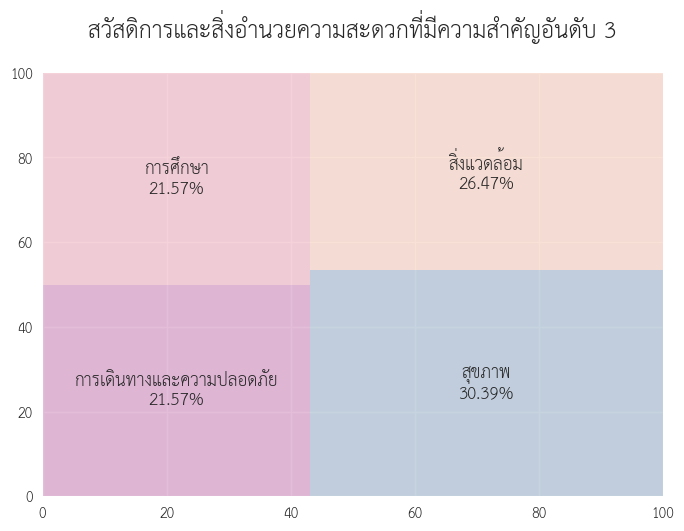

In [ ]:
# นับจำนวนความถี่ของข้อมูลในแต่ละหมวดหมู่
a3 = df['3. สวัสดิการและสิ่งอำนวยความสะดวกที่สำคัญอันดับ 3'].value_counts()['ด้านการเดินทางและความปลอดภัย']
b3 = df['3. สวัสดิการและสิ่งอำนวยความสะดวกที่สำคัญอันดับ 3'].value_counts()['ด้านการศึกษา']
c3 = df['3. สวัสดิการและสิ่งอำนวยความสะดวกที่สำคัญอันดับ 3'].value_counts()['ด้านสุขภาพ']
d3 = df['3. สวัสดิการและสิ่งอำนวยความสะดวกที่สำคัญอันดับ 3'].value_counts()['ด้านสิ่งแวดล้อม']

# สร้างข้อมูลจำนวนแต่ละหมวดหมู่
categories = ['การเดินทางและความปลอดภัย', 'การศึกษา', 'สุขภาพ', 'สิ่งแวดล้อม']
counts = [a3, b3, c3, d3]

# คำนวณเปอร์เซ็นต์
total = sum(counts)
percentages = [(count / total) * 100 for count in counts]

# การแยกสีสำหรับแต่ละส่วนของ tree map
colors = ["#D9A1C8", "#F2BFCA", "#B0C2D4", "#F9D5C6"]  # เปลี่ยนสีตามที่ต้องการ
plt.rcParams.update({'font.size': 12})

# สร้าง tree map
squarify.plot(sizes=percentages, label=[f'{categories[i]}\n{percentages[i]:.2f}%' for i in range(len(categories))], color=colors, alpha=0.7)
plt.title('สวัสดิการและสิ่งอำนวยความสะดวกที่มีความสำคัญอันดับ 3\n',  size=16)  # เพิ่มชื่อกราฟ

plt.show()

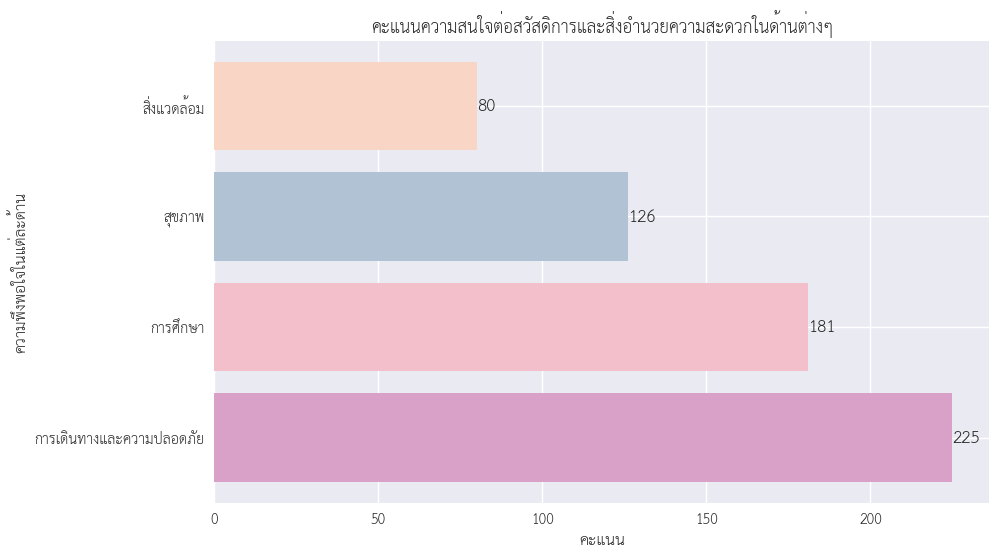

In [ ]:
# กำหนดข้อมูล
categories = ['การเดินทางและความปลอดภัย', 'การศึกษา', 'สุขภาพ', 'สิ่งแวดล้อม']
data = [(a1, a2, a3), (b1, b2, b3), (c1, c2, c3), (d1, d2, d3)]
counts = []

# คำนวณคะแนนสำหรับแต่ละหมวดหมู่
for values in data:
    count = 0
    for i, value in enumerate(values):
        count += value * (3 - i)
    counts.append(count)

# สร้าง funnel chart
plt.figure(figsize=(10, 6))
plt.barh(categories, counts, color=["#D9A1C8", "#F2BFCA", "#B0C2D4", "#F9D5C6"])
plt.xlabel('คะแนน')
plt.ylabel('ความพึงพอใจในแต่ละด้าน')
plt.title('คะแนนความสนใจต่อสวัสดิการและสิ่งอำนวยความสะดวกในด้านต่างๆ')

# เพิ่มจำนวนลงในกราฟ
for i in range(len(categories)):
    plt.text(counts[i], i, str(counts[i]), ha='left', va='center')

plt.show()

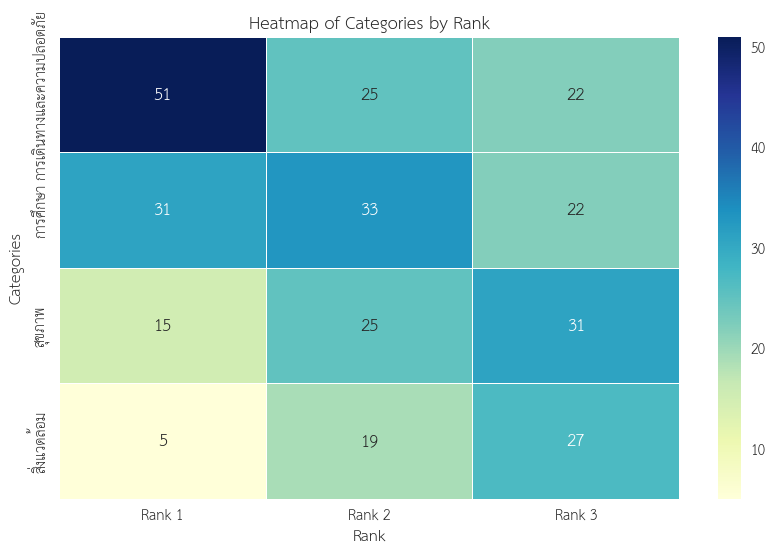

In [ ]:
# สร้าง DataFrame จากข้อมูลของคุณ
data = {
    'Categories': ['การเดินทางและความปลอดภัย', 'การศึกษา', 'สุขภาพ', 'สิ่งแวดล้อม'],
    'Rank 1': [a1, b1, c1, d1],
    'Rank 2': [a2, b2, c2, d2],
    'Rank 3': [a3, b3, c3, d3]
}
df30 = pd.DataFrame(data)

# สร้าง Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df30.set_index('Categories'), cmap='YlGnBu', annot=True, fmt="d", linewidths=.5)
plt.title('Heatmap of Categories by Rank')
plt.xlabel('Rank')
plt.ylabel('Categories')
plt.show()

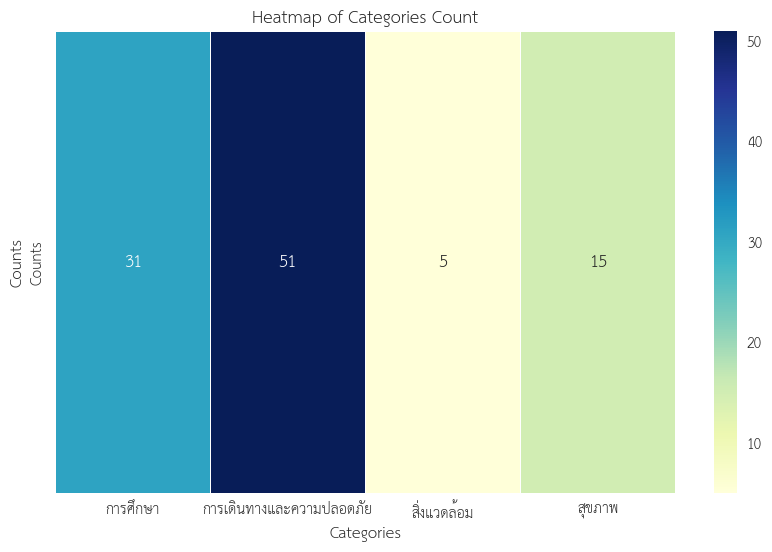

In [ ]:
# สร้าง DataFrame จากข้อมูลของคุณ
data = {
    'Categories': ['การเดินทางและความปลอดภัย', 'การศึกษา', 'สุขภาพ', 'สิ่งแวดล้อม'],
    'Counts': [a1, b1, c1, d1]
}
df29 = pd.DataFrame(data)

# สร้าง Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df29.pivot_table(index='Categories', values='Counts', aggfunc='first').T, cmap='YlGnBu', annot=True, fmt="d", linewidths=.5)
plt.title('Heatmap of Categories Count')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.show()